In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv('houseprice.csv')
df=data.copy()

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df = df.set_index("Id")

Feature Categorization

In [7]:
# Feature categorization
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
year_features = [col for col in numerical_cols if 'Year' in col or 'Yr' in col]
discrete_features = [col for col in numerical_cols if df[col].nunique() < 25 and col not in year_features]
continuous_features = list(set(numerical_cols) - set(discrete_features + year_features))
categorical_features = df.select_dtypes(include=['object']).columns

In [8]:
print("Numerical Columns:", numerical_cols)
print("Year Features:", year_features)
print("Discrete Features:", discrete_features)
print("Continuous Features:", continuous_features)
print("Categorical Features:", categorical_features)

Numerical Columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Year Features: ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
Discrete Features: ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']
Continuous Features: ['BsmtFinSF2', 'GarageArea', 'GrLivArea'

Feature Distribution Plots

In [9]:
# Function for plotting feature distributions
def plot_feature_distribution(df, features, plot_type='hist'):
    for feature in features:
        plt.figure(figsize=(8, 6))
        if plot_type == 'hist':
            sns.histplot(df[feature], kde=True)
        elif plot_type == 'box':
            sns.boxplot(x=df[feature])
        elif plot_type == 'scatter':
            sns.scatterplot(x=df[feature], y=df['SalePrice'])
        plt.title(f'{feature} Analysis')
        plt.xlabel(feature)
        plt.show()

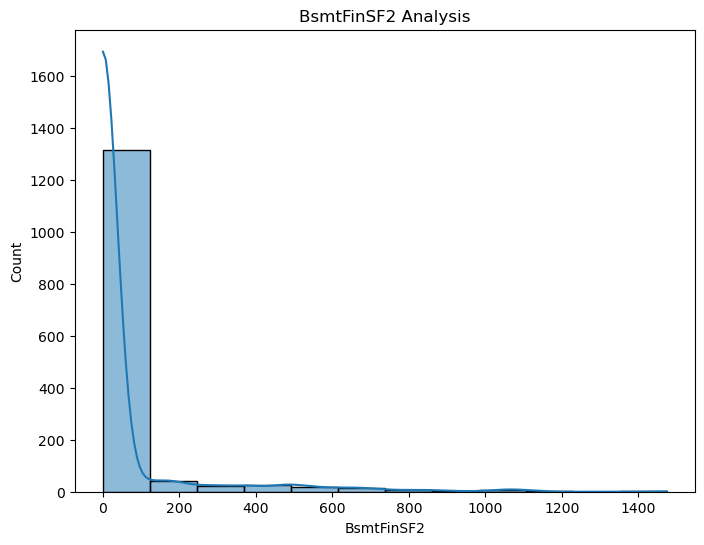

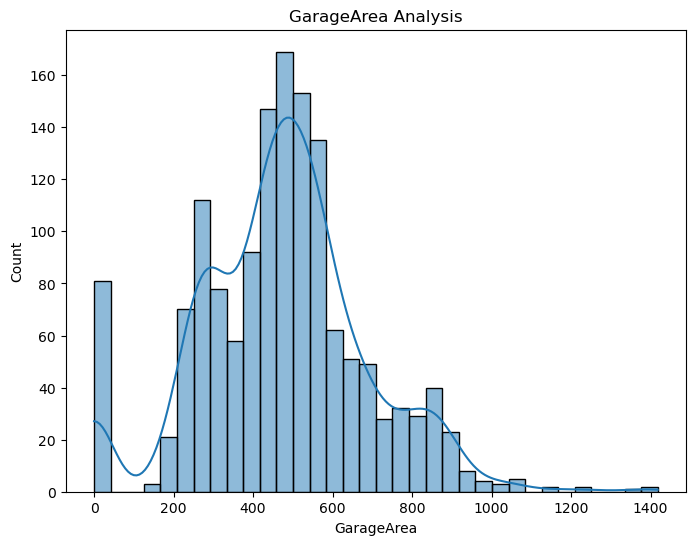

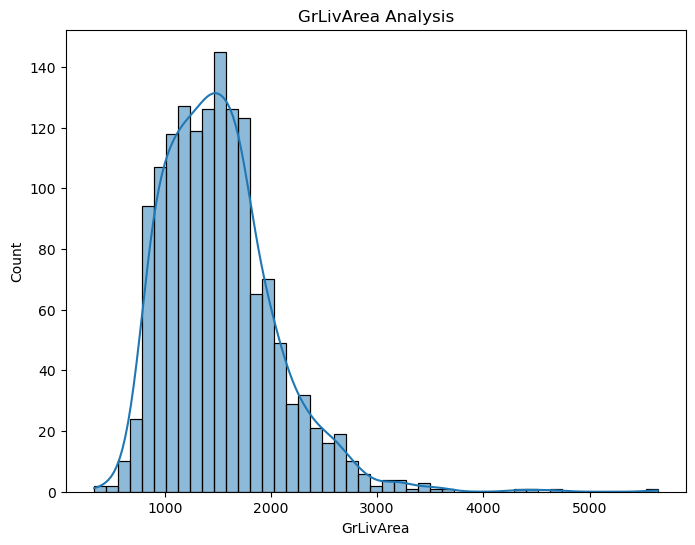

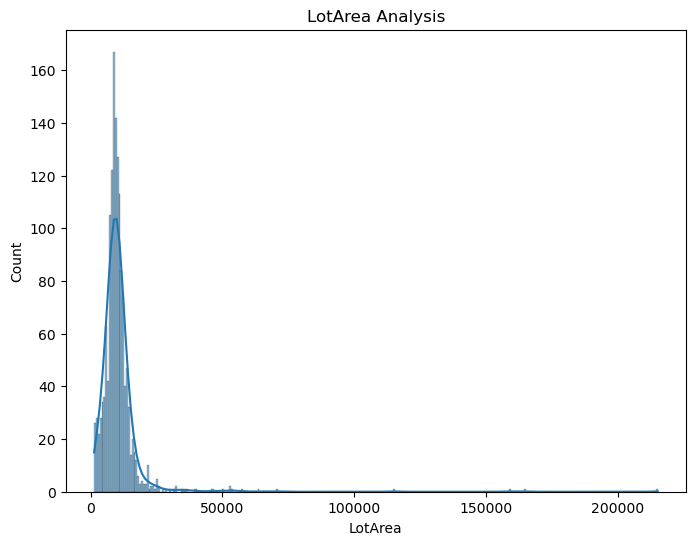

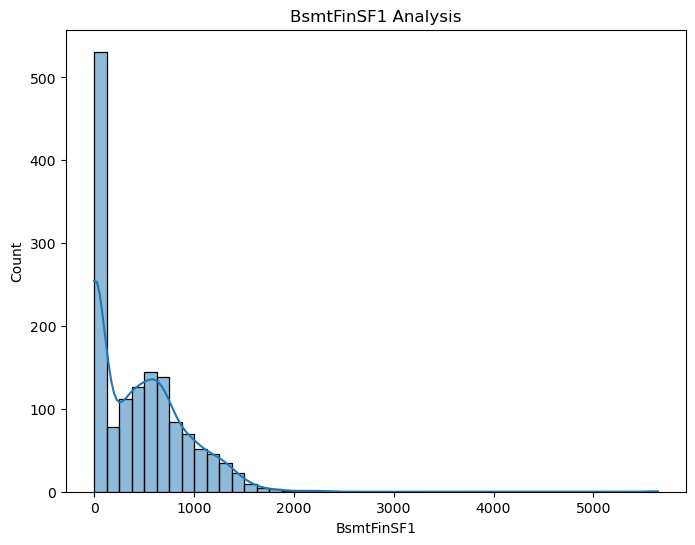

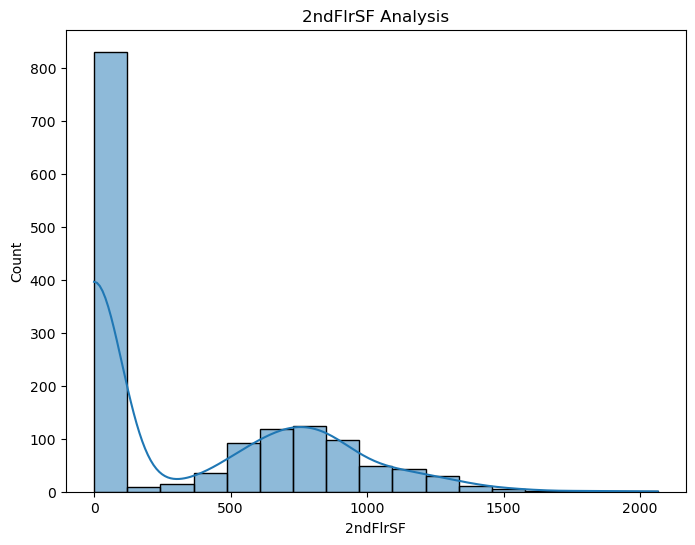

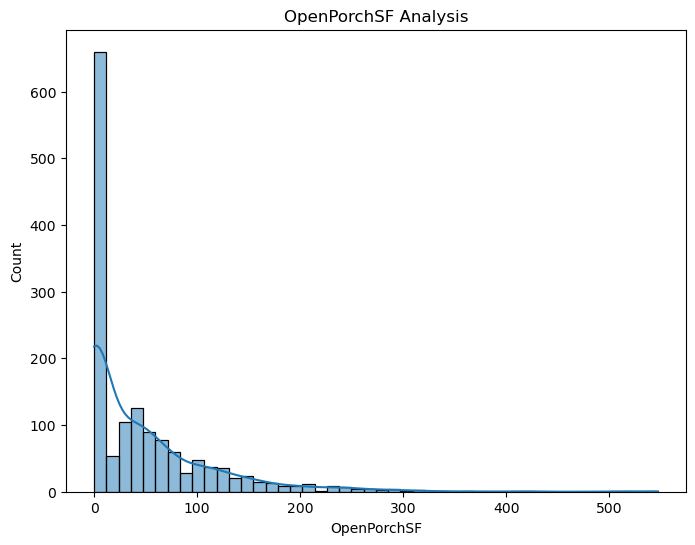

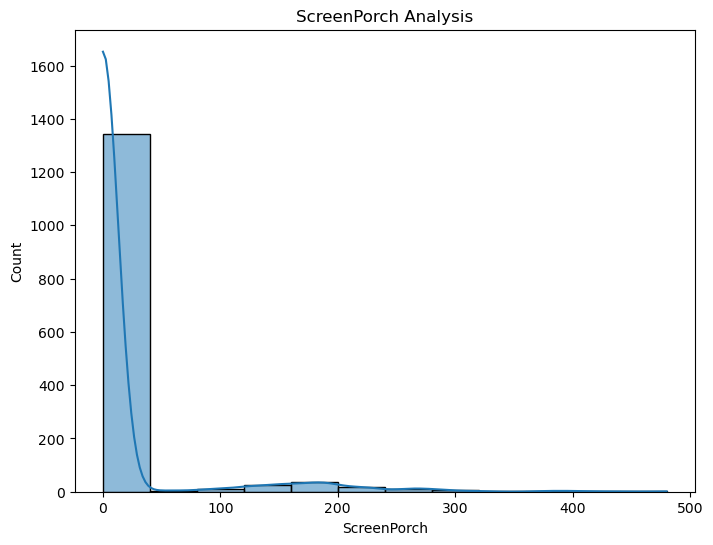

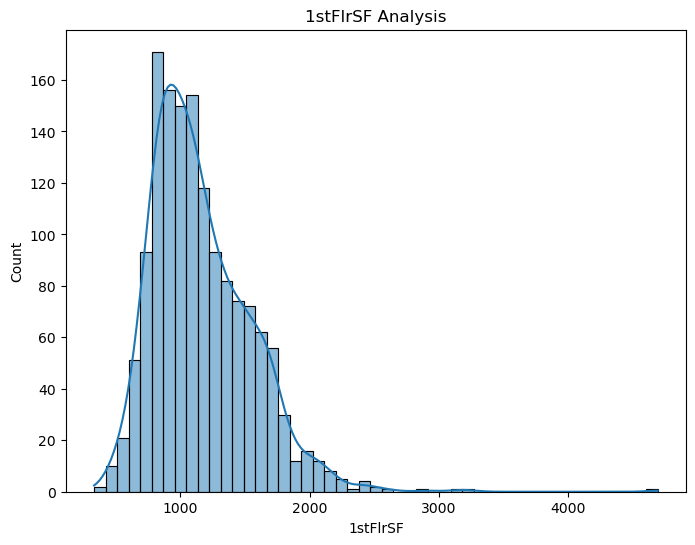

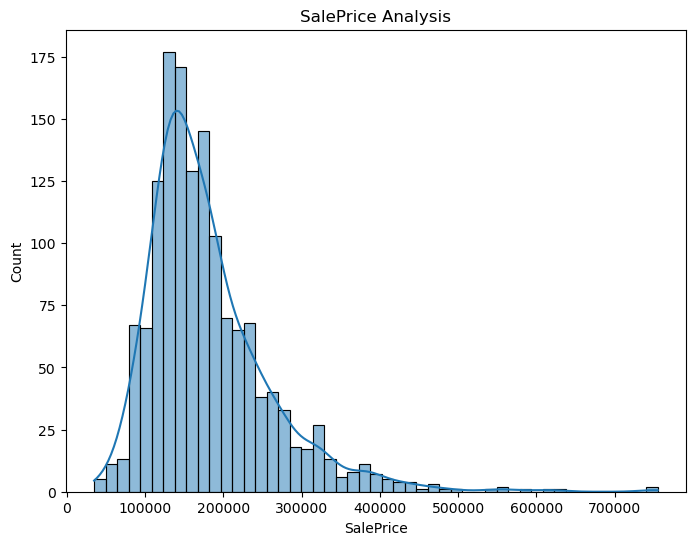

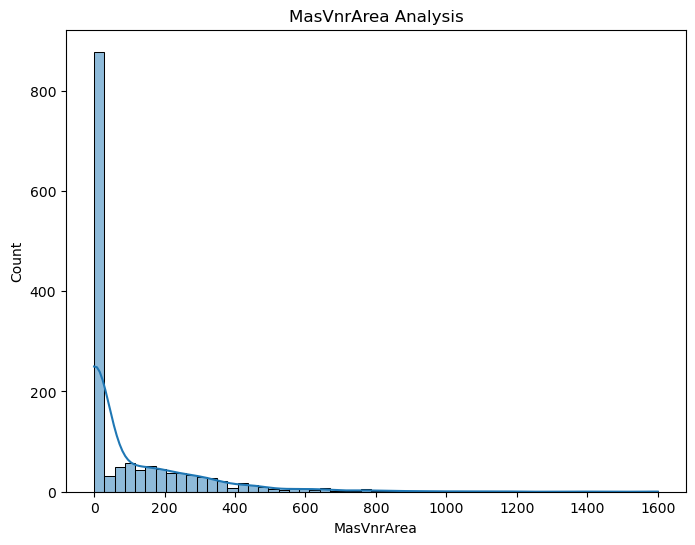

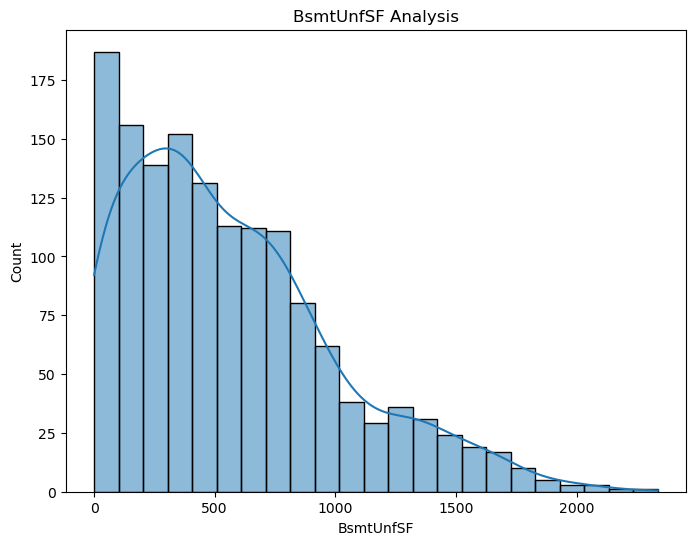

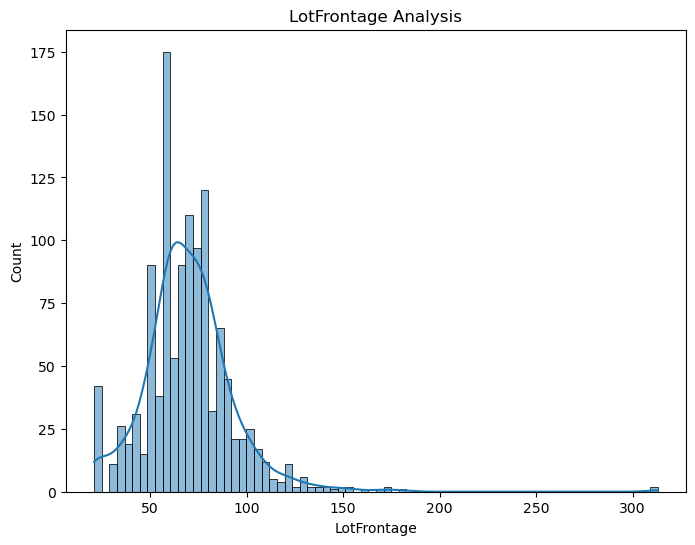

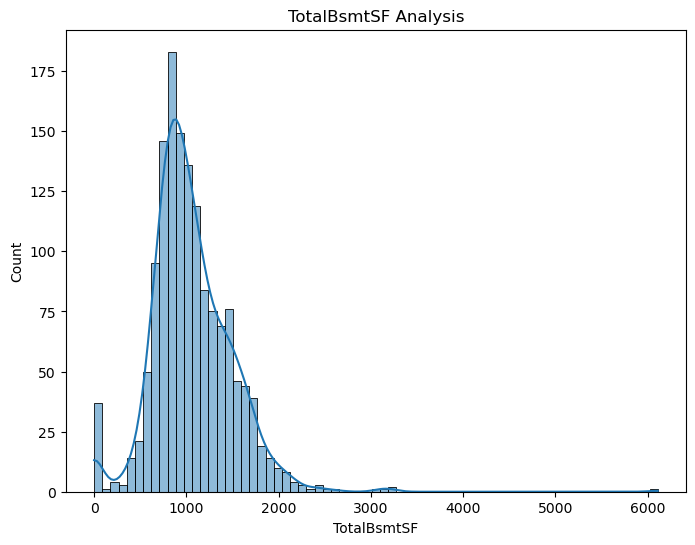

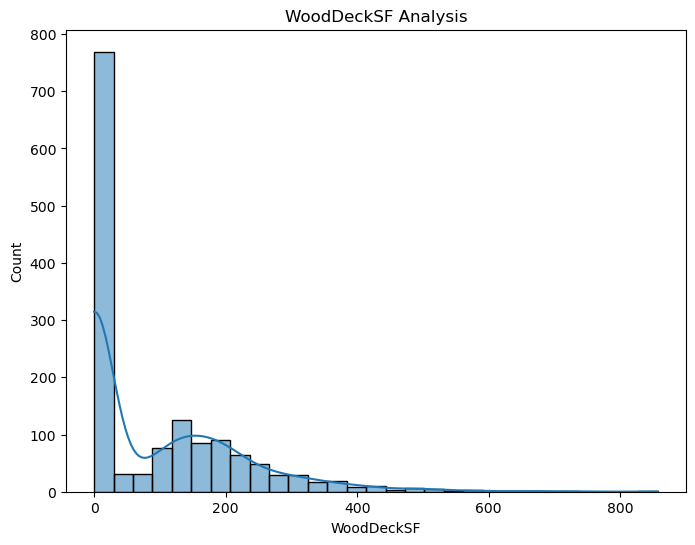

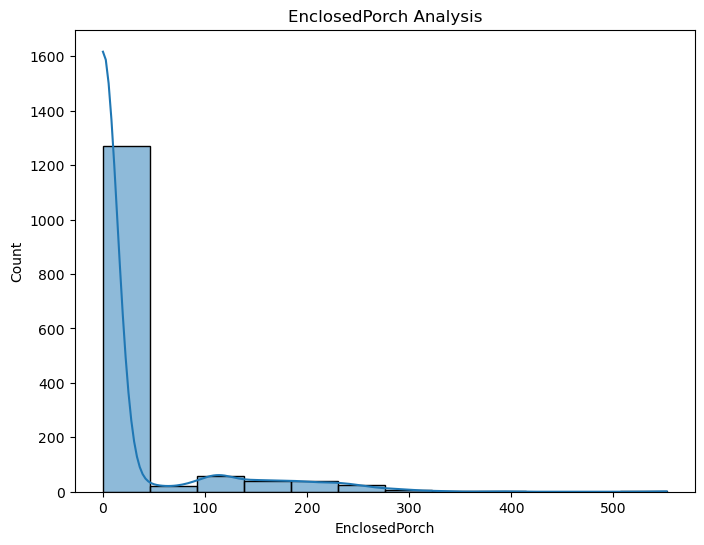

In [10]:
# Plot continuous features
plot_feature_distribution(df, continuous_features, 'hist')

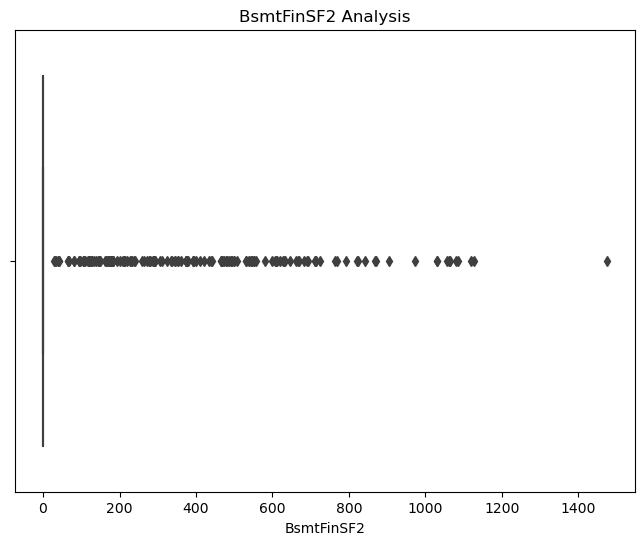

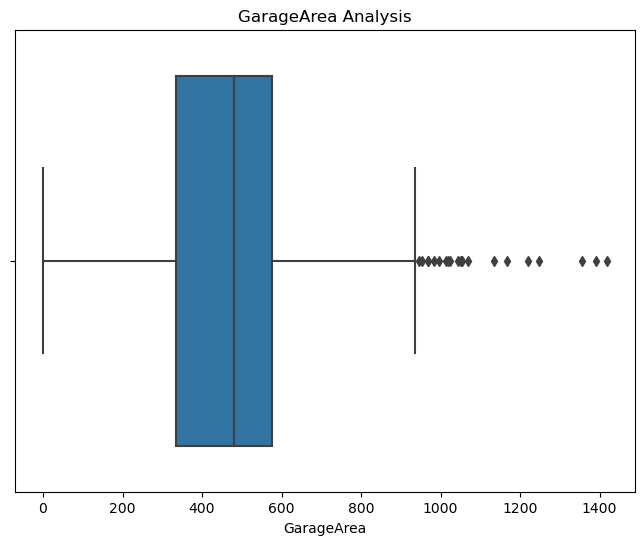

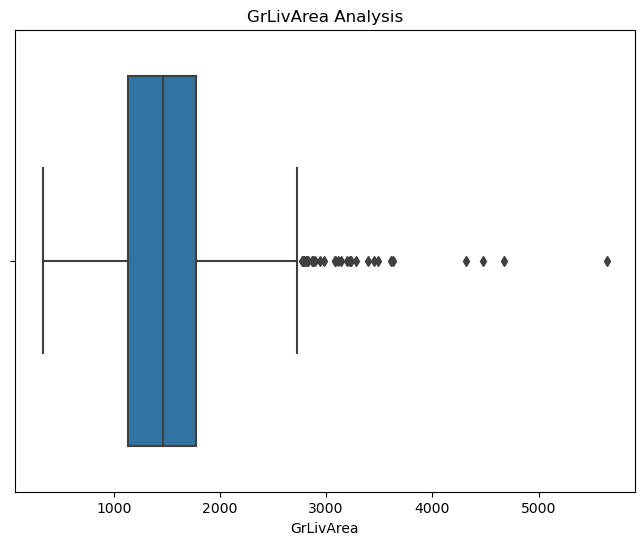

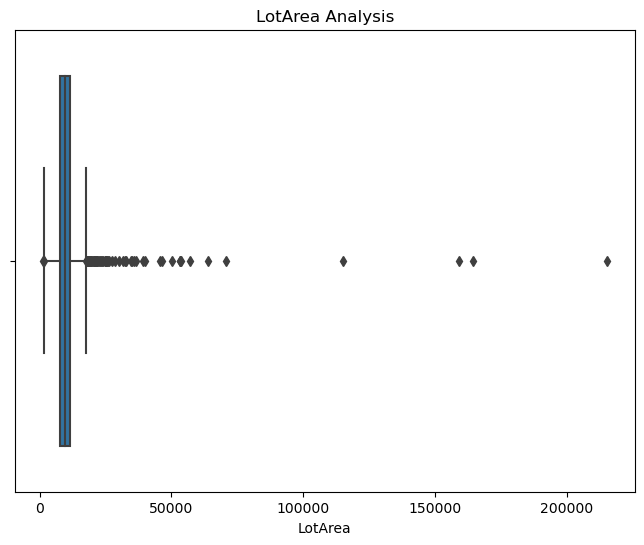

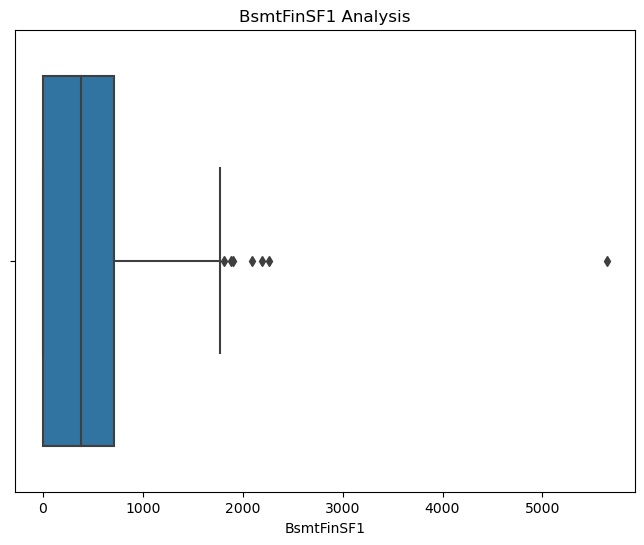

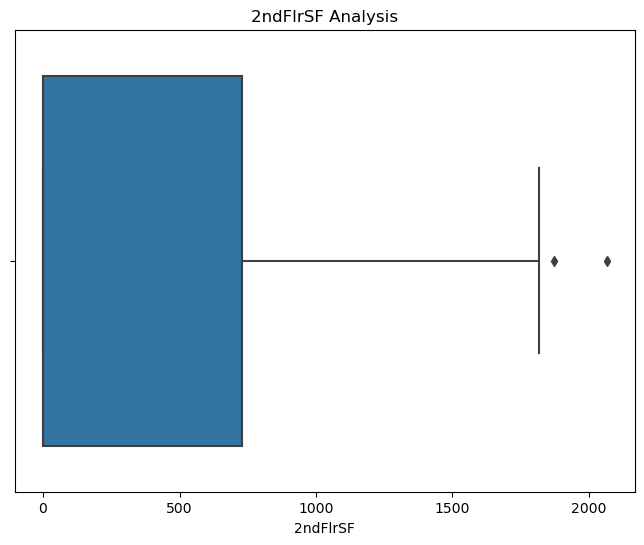

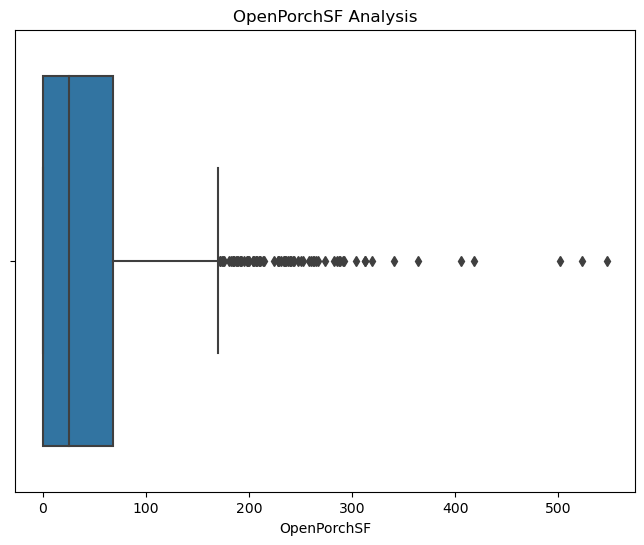

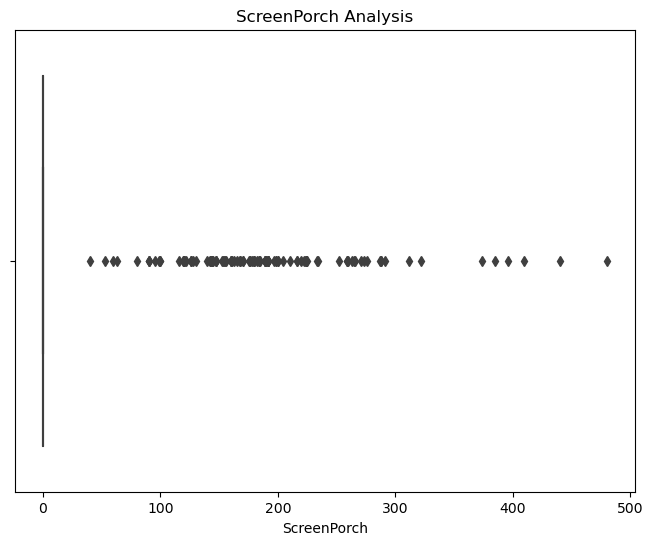

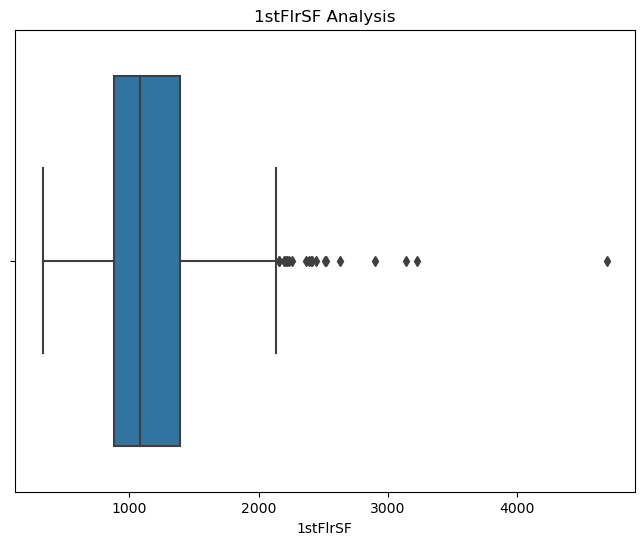

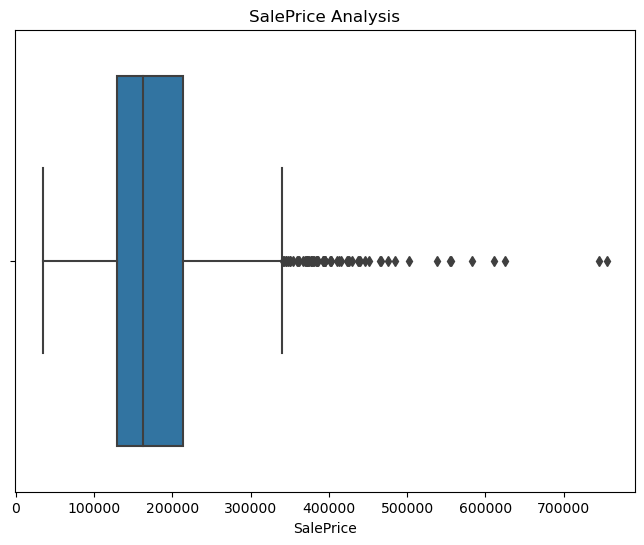

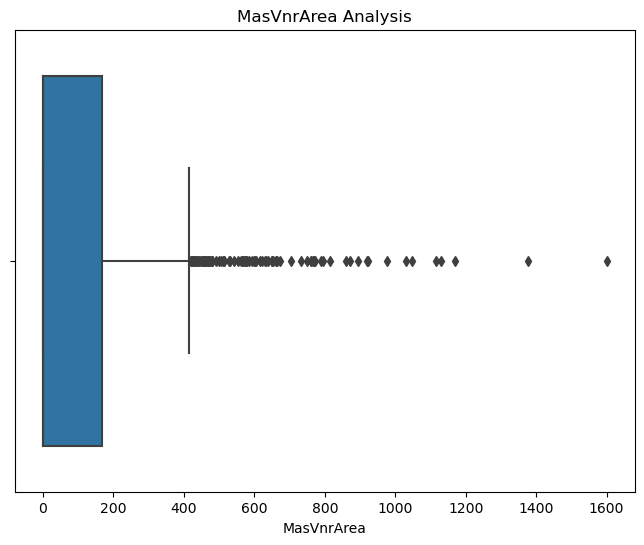

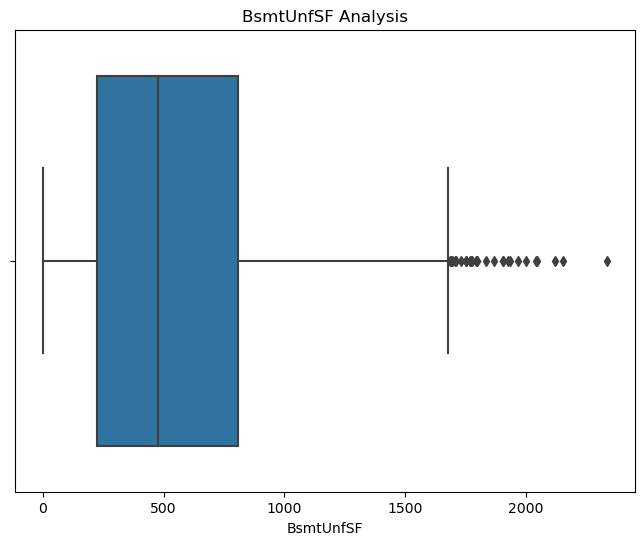

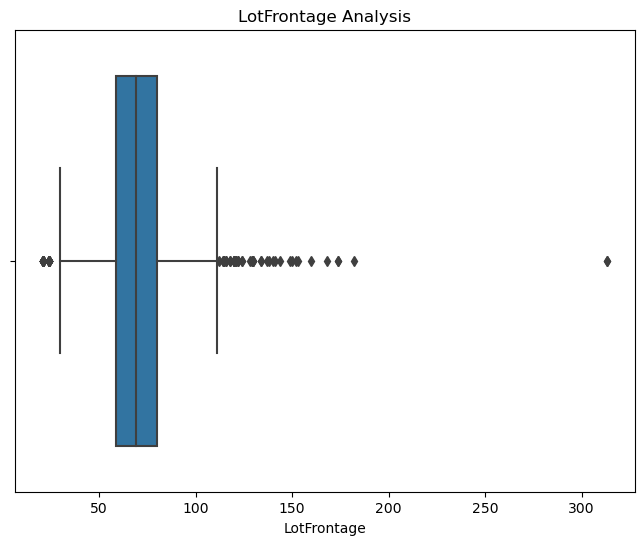

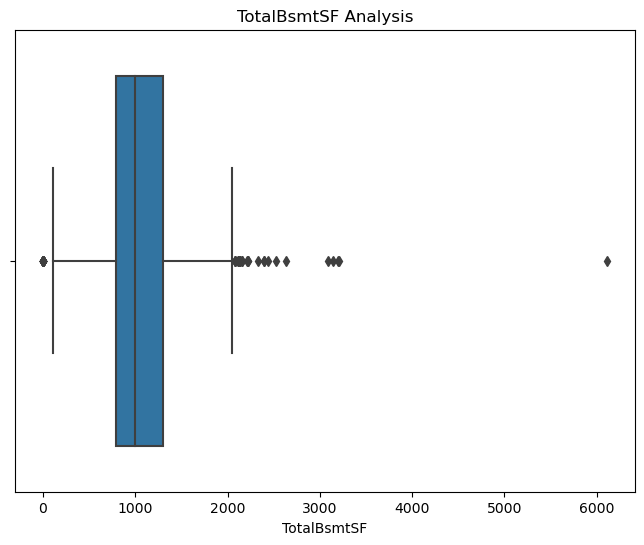

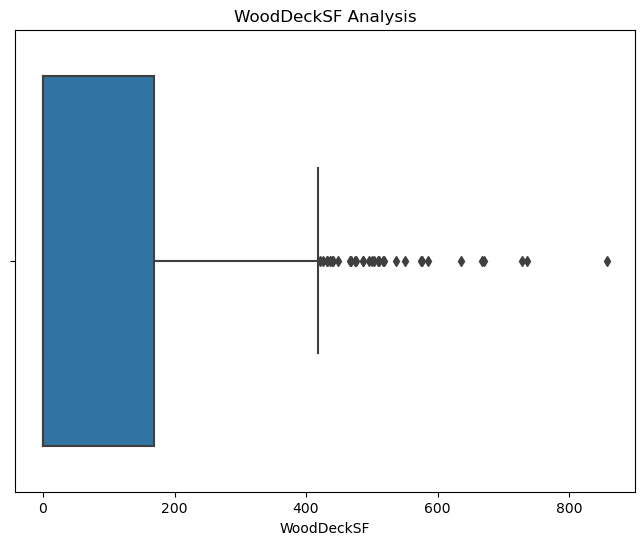

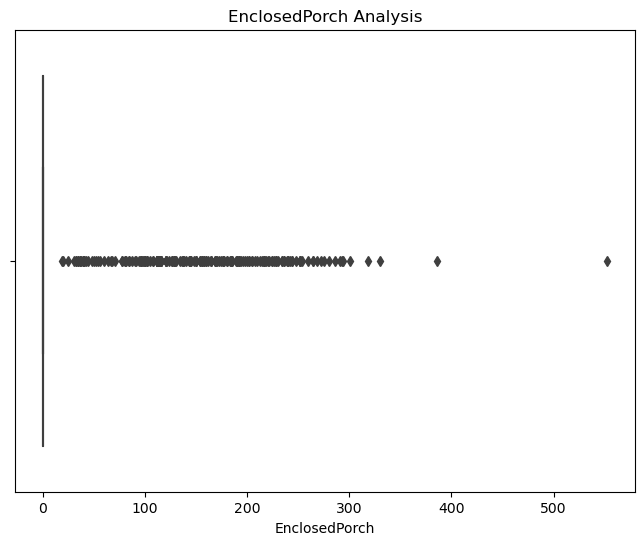

In [11]:
plot_feature_distribution(df, continuous_features, 'box')

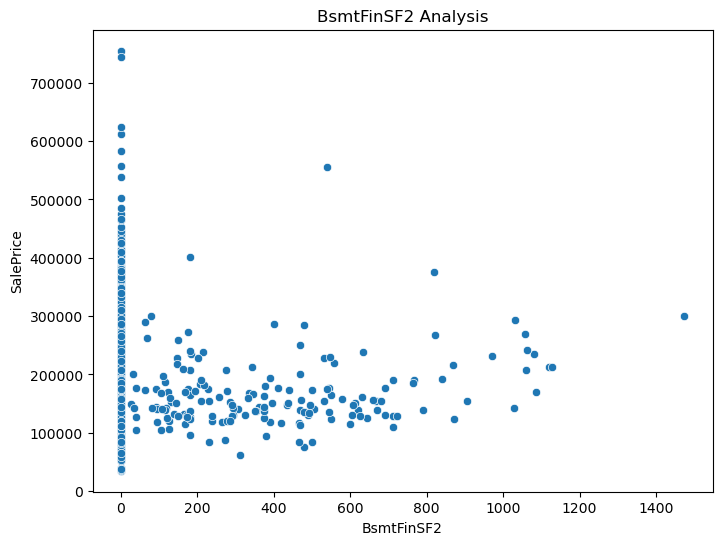

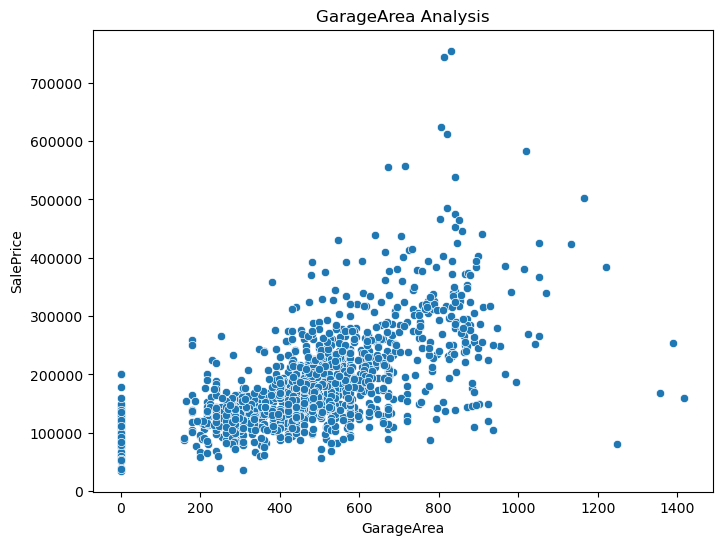

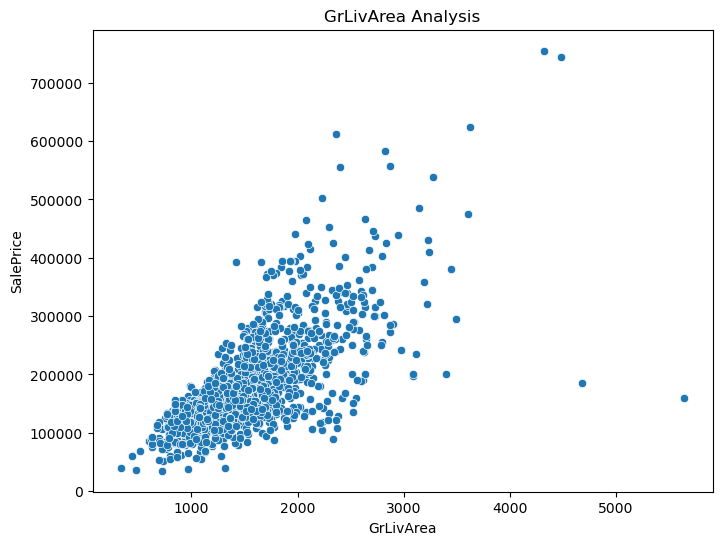

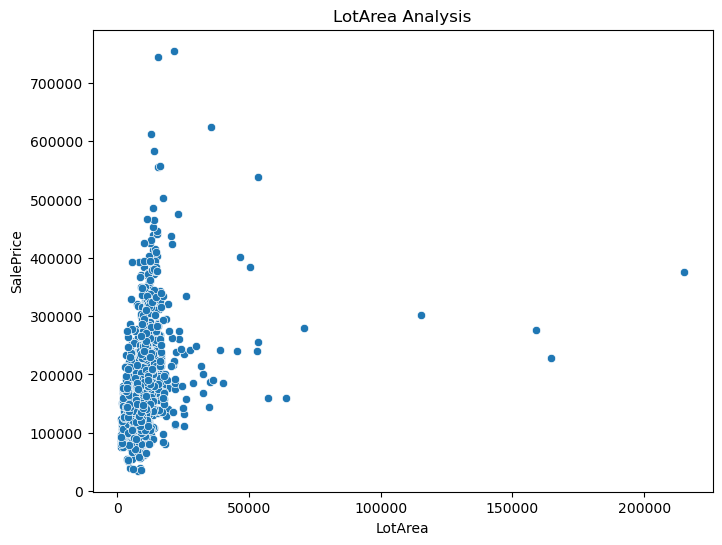

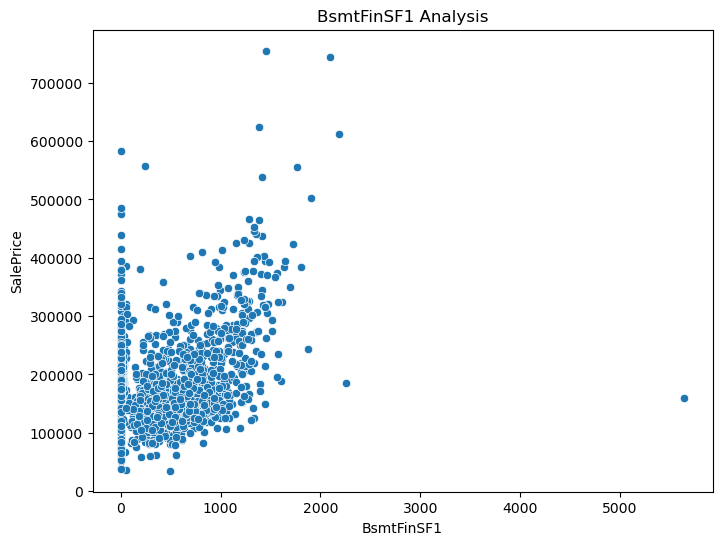

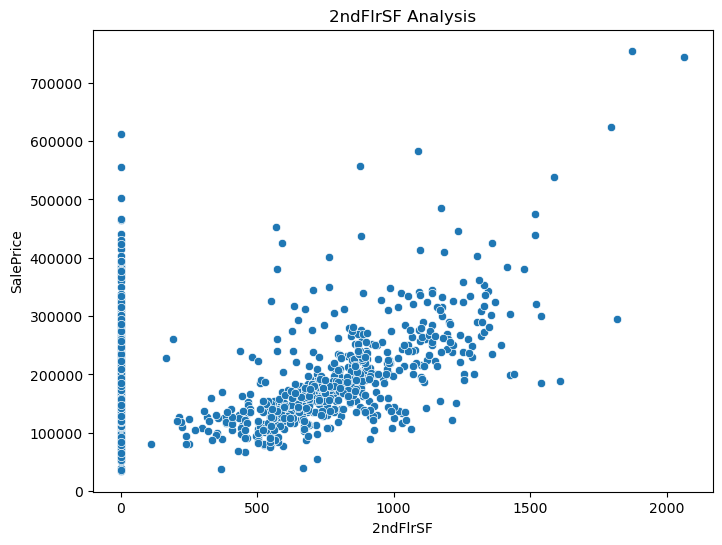

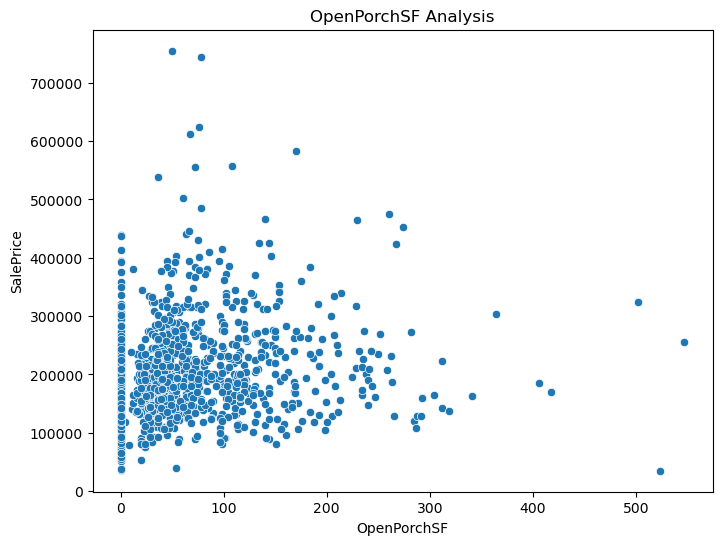

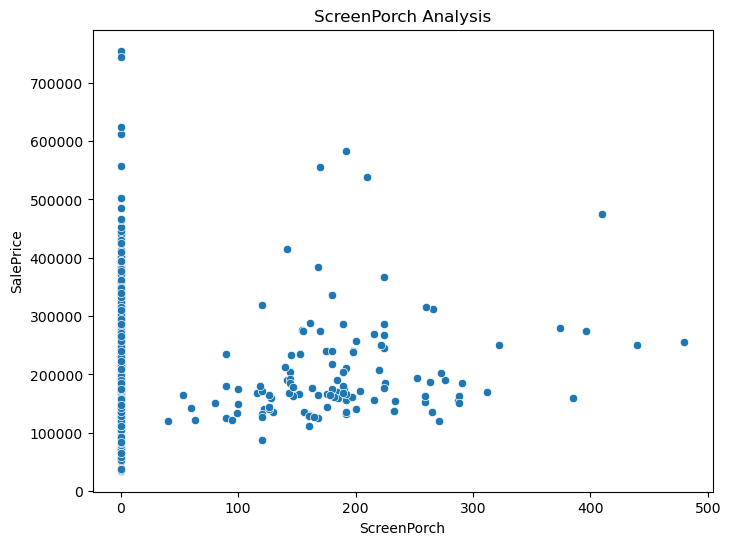

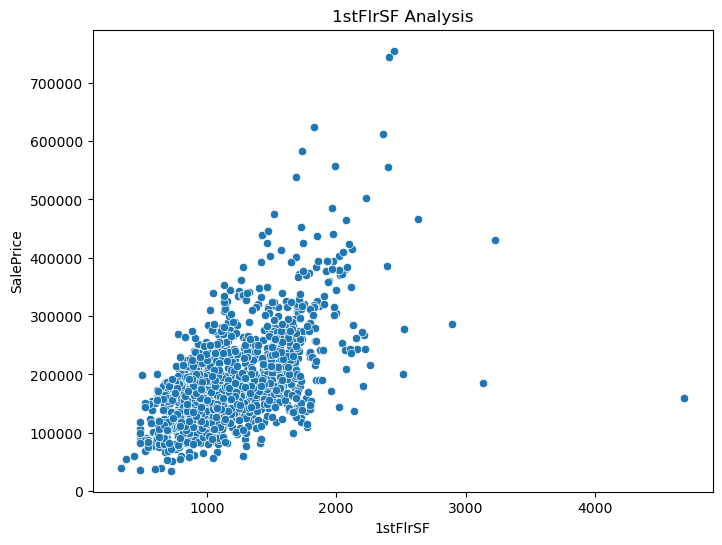

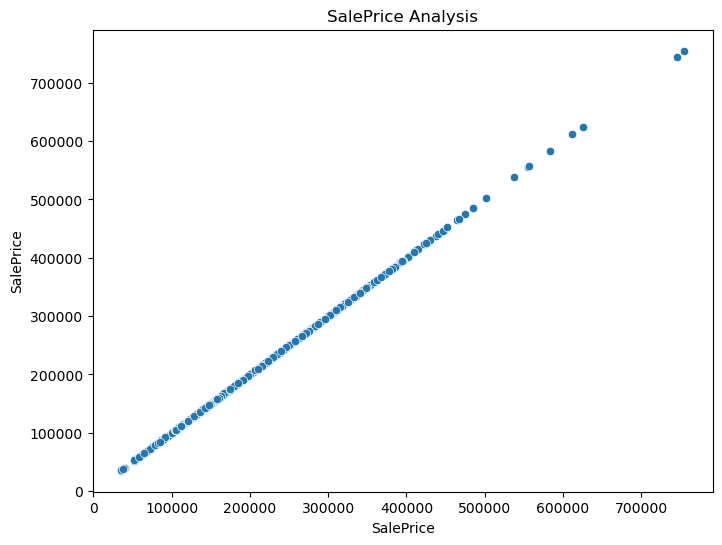

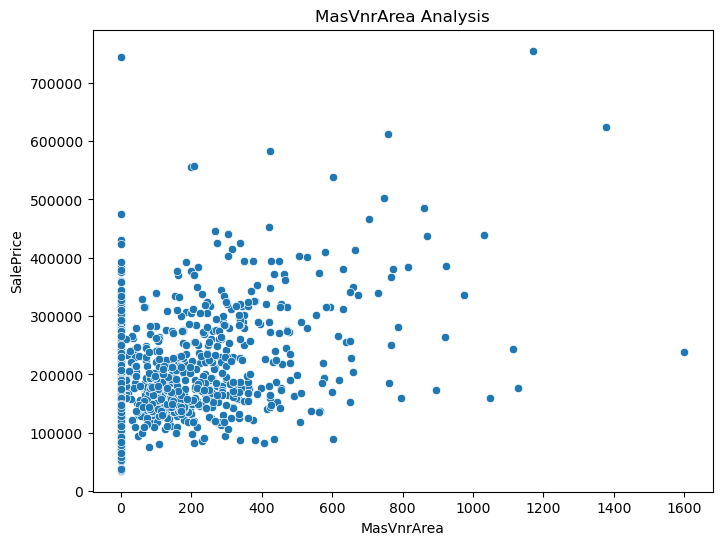

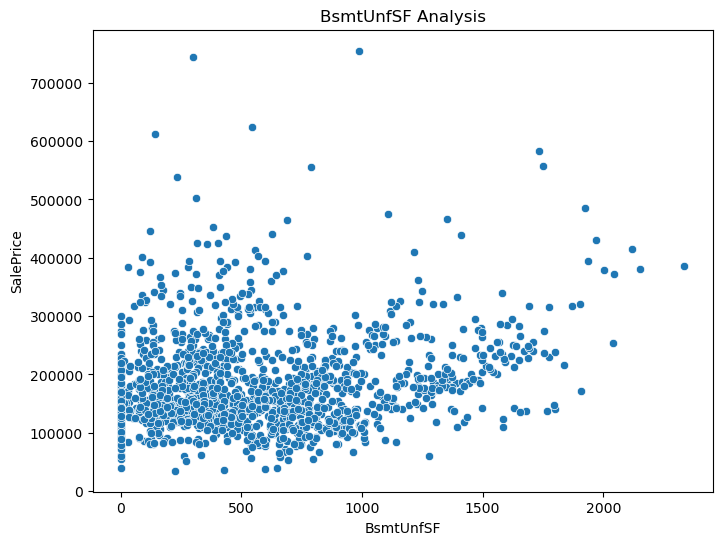

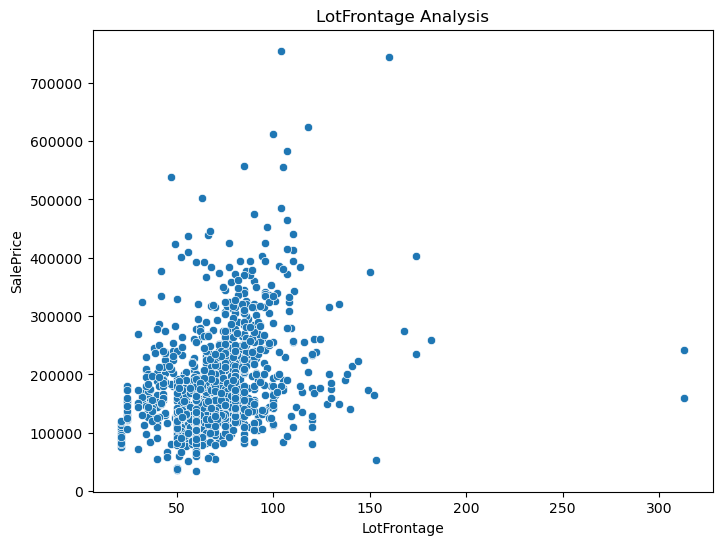

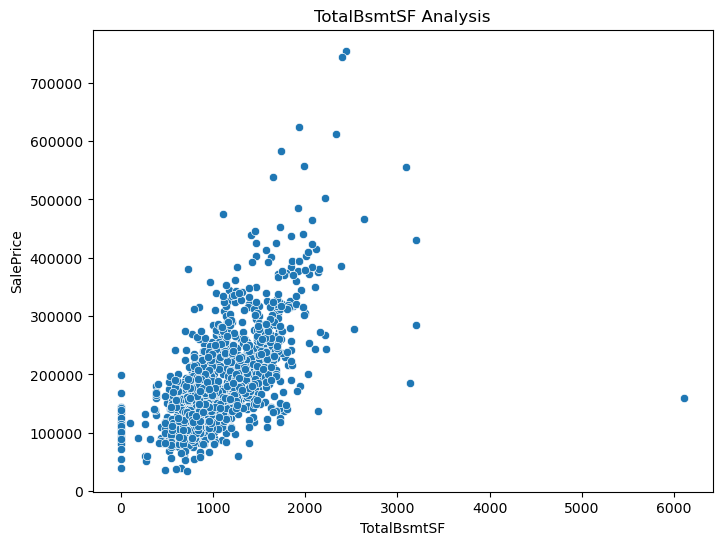

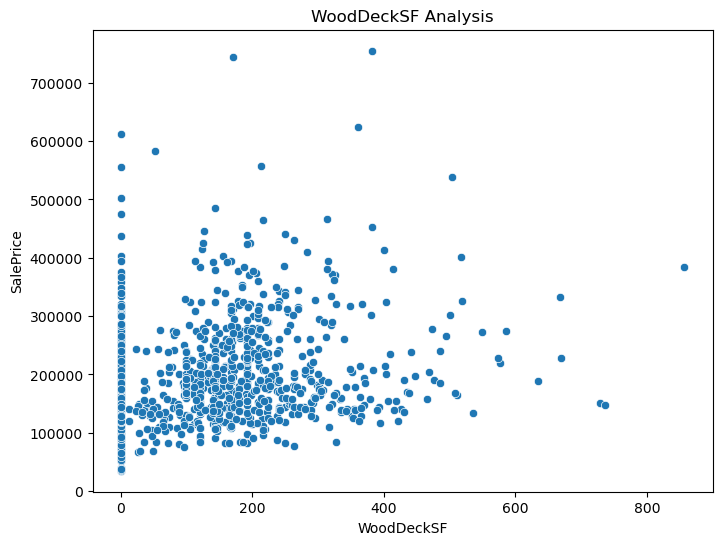

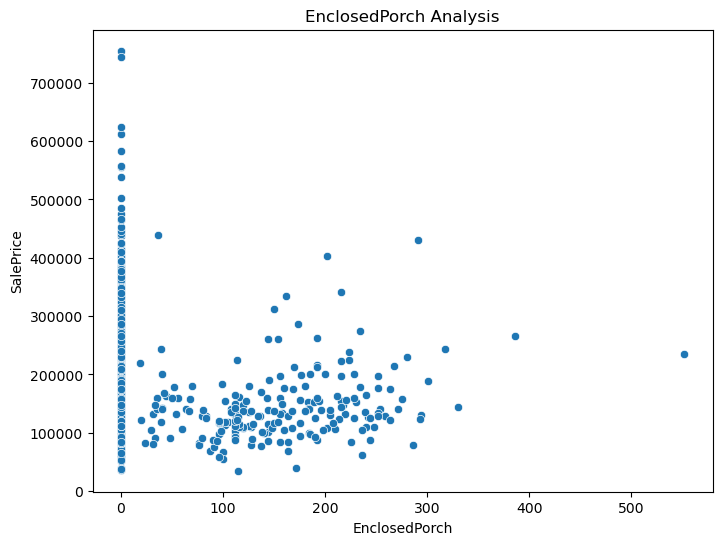

In [12]:
plot_feature_distribution(df, continuous_features, 'scatter')


C:\Users\admin\AppData\Local\Temp\ipykernel_9576\825745447.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[feature], y=df['SalePrice'], ci=None, ax=ax)
C:\Users\admin\AppData\Local\Temp\ipykernel_9576\825745447.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[feature], y=df['SalePrice'], ci=None, ax=ax)
C:\Users\admin\AppData\Local\Temp\ipykernel_9576\825745447.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[feature], y=df['SalePrice'], ci=None, ax=ax)
C:\Users\admin\AppData\Local\Temp\ipykernel_9576\825745447.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[feature], y=df['SalePrice'], ci=None, ax=ax)
C:\Users\admin\AppData\Local\Temp\ipykernel_9576\825745447.py:4: FutureWarning: 

The `ci` parameter is deprecat

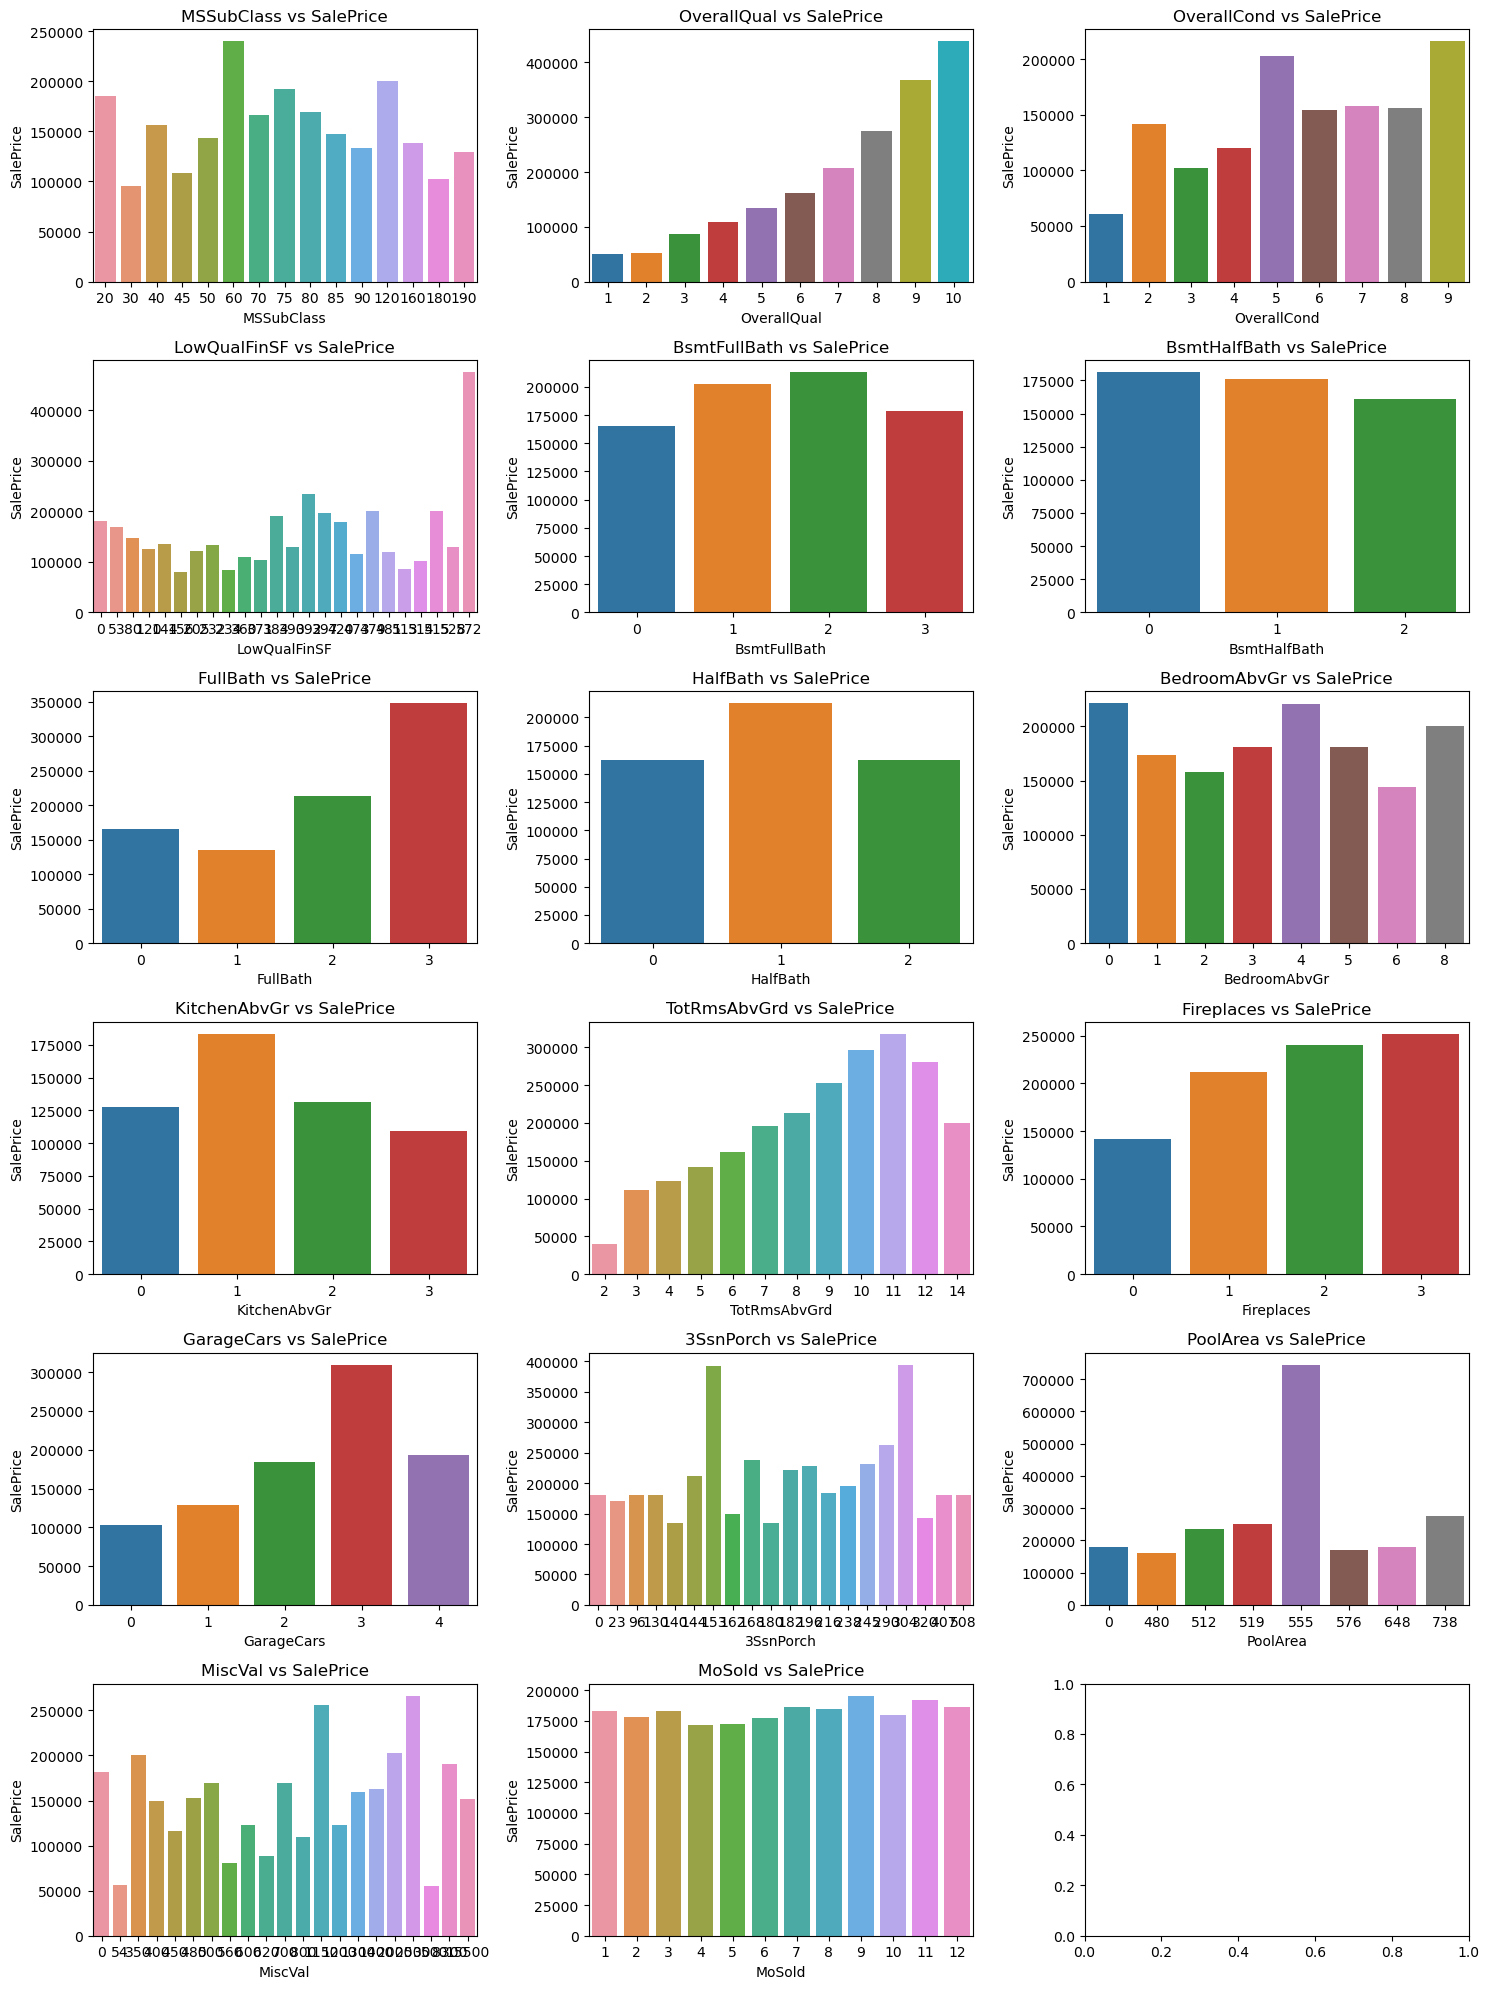

In [13]:
# Plot discrete features vs SalePrice
fig, axes = plt.subplots(len(discrete_features) // 3 + 1, 3, figsize=(15, 20))
for ax, feature in zip(axes.flat, discrete_features):
    sns.barplot(x=df[feature], y=df['SalePrice'], ci=None, ax=ax)
    ax.set_title(f'{feature} vs SalePrice')
    ax.set_xlabel(feature)
    ax.set_ylabel('SalePrice')
plt.tight_layout()
plt.show()


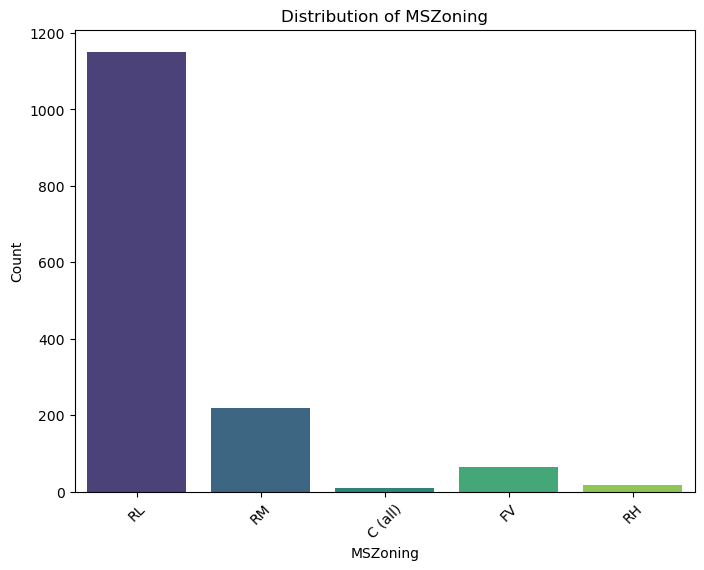

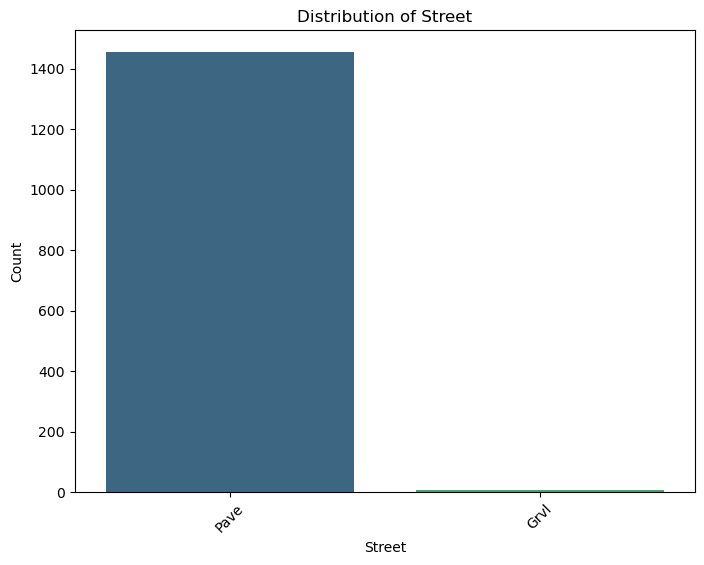

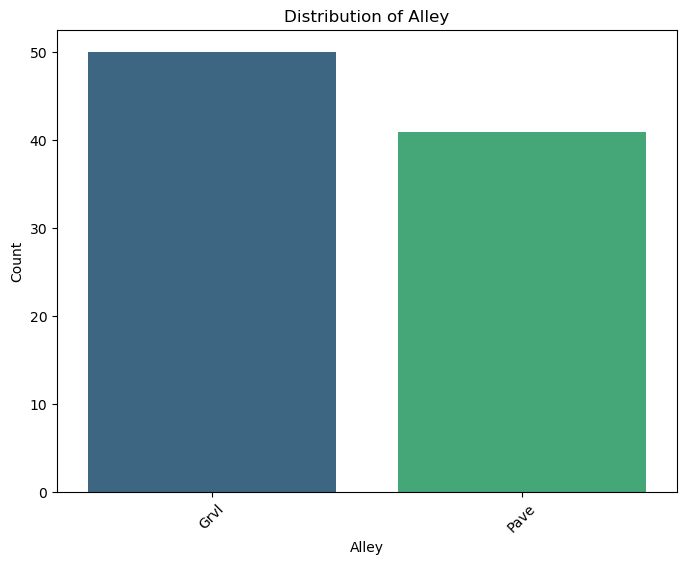

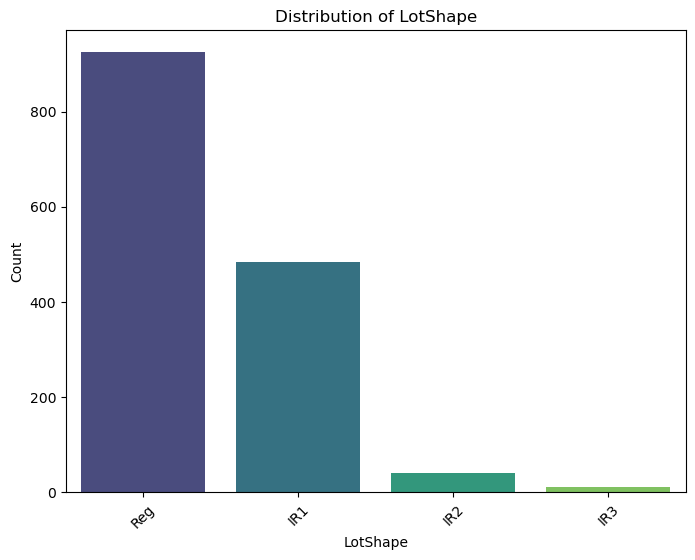

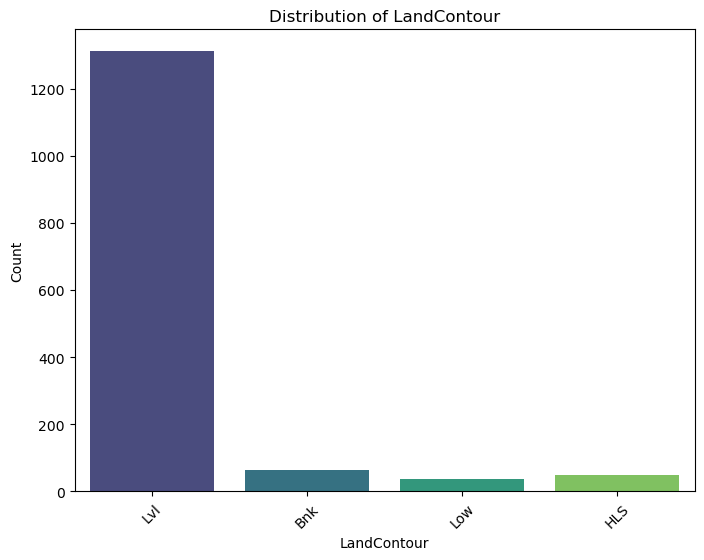

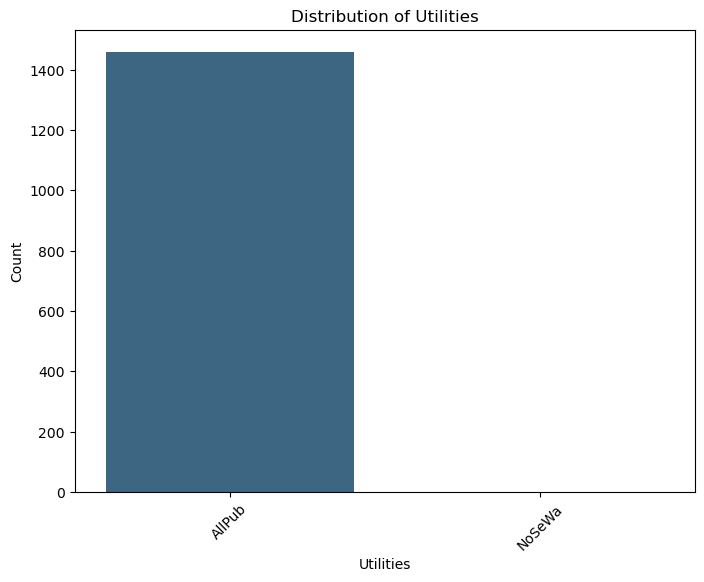

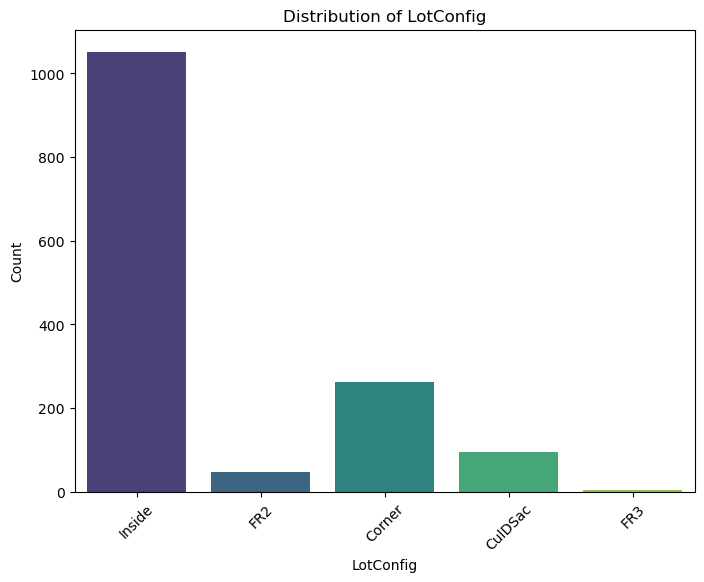

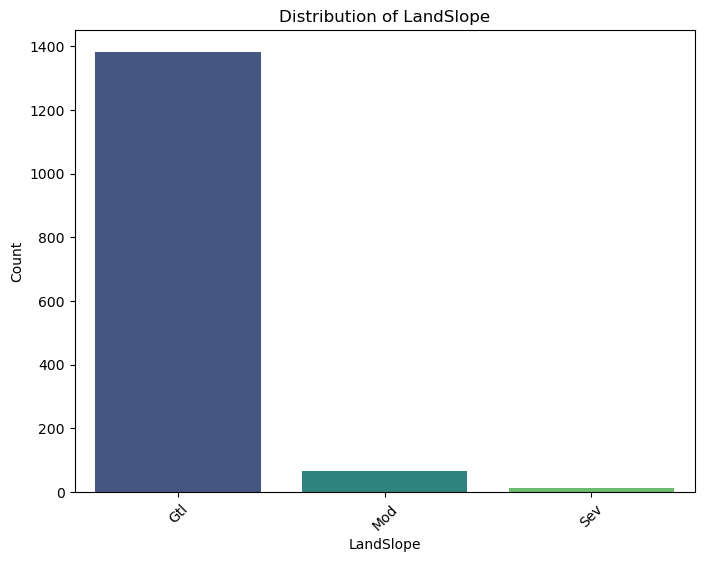

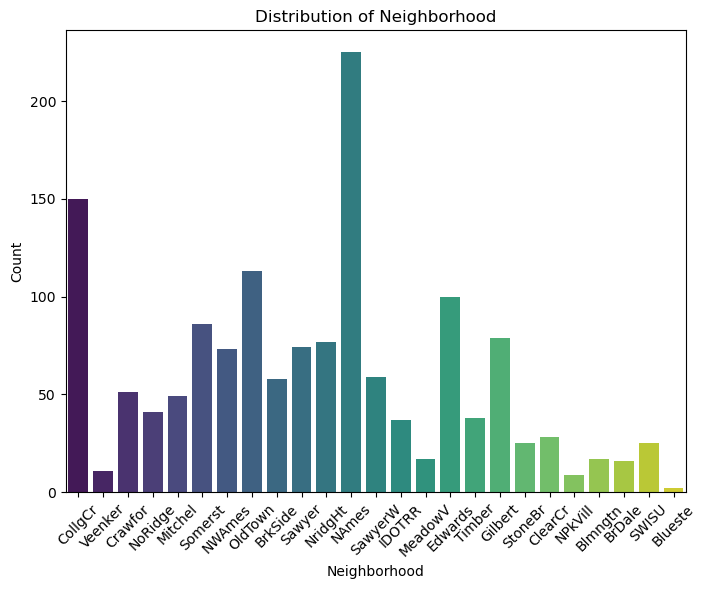

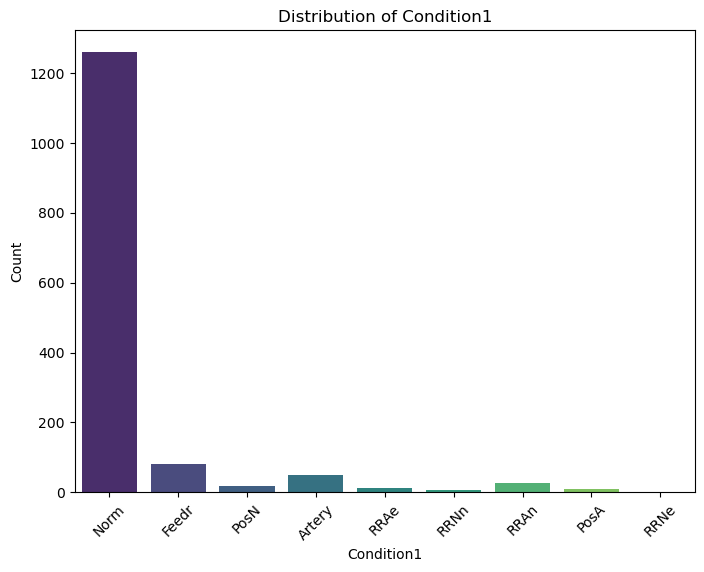

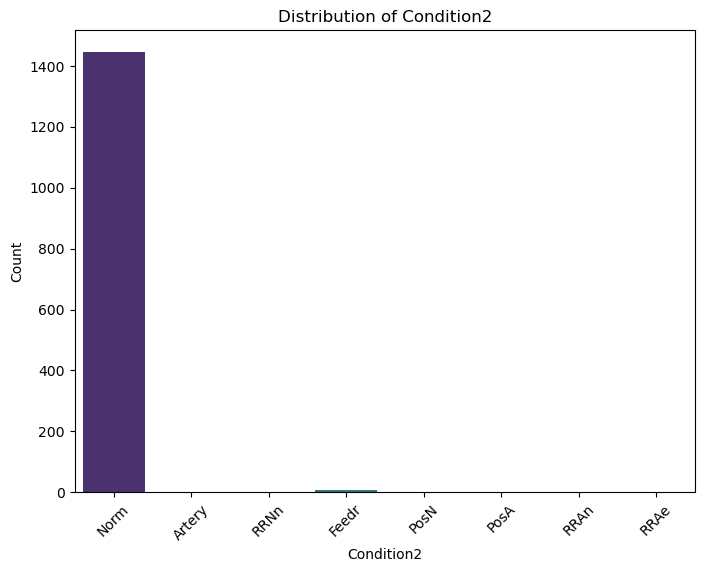

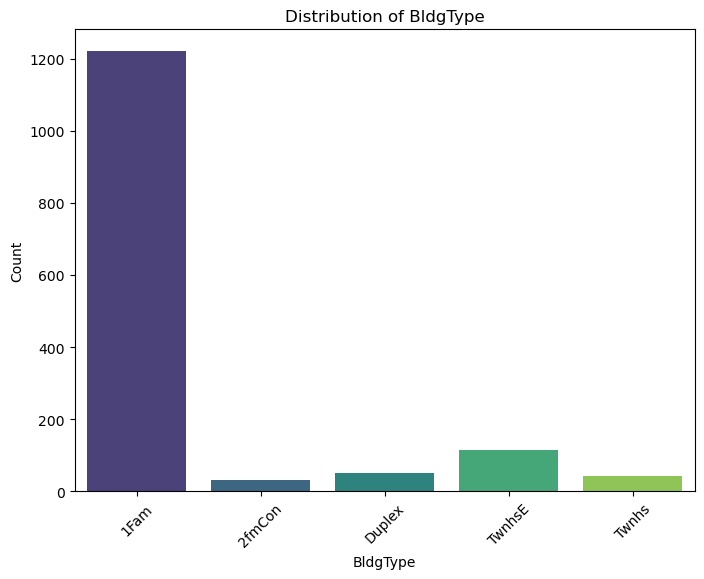

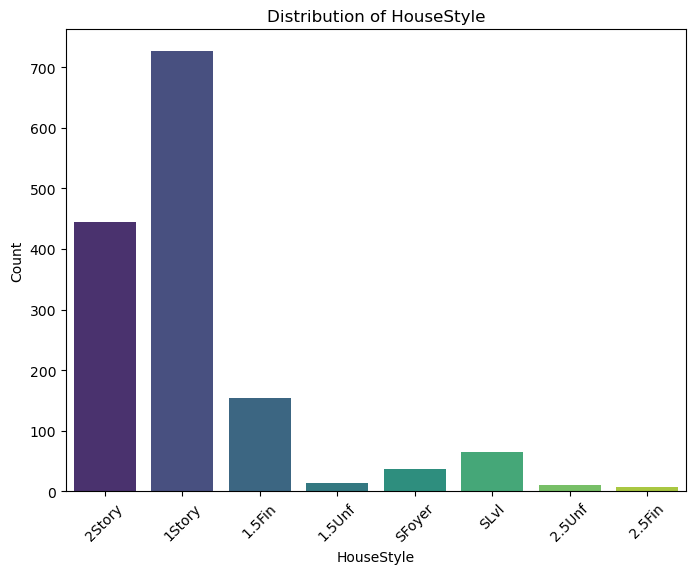

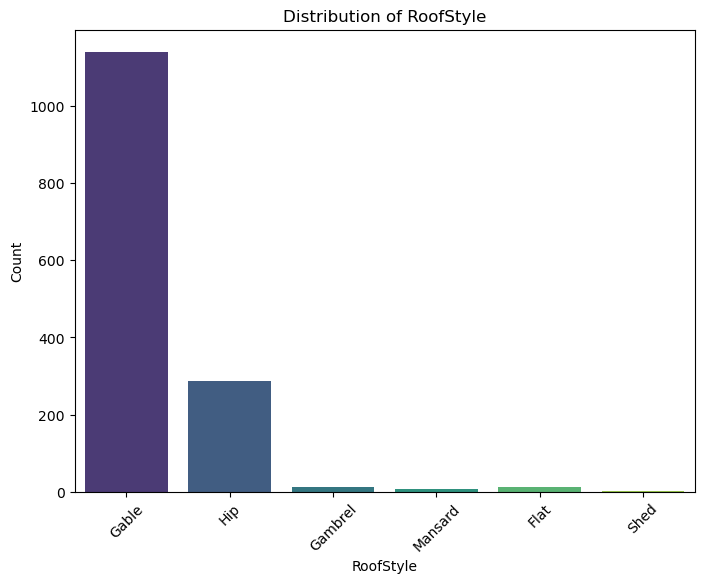

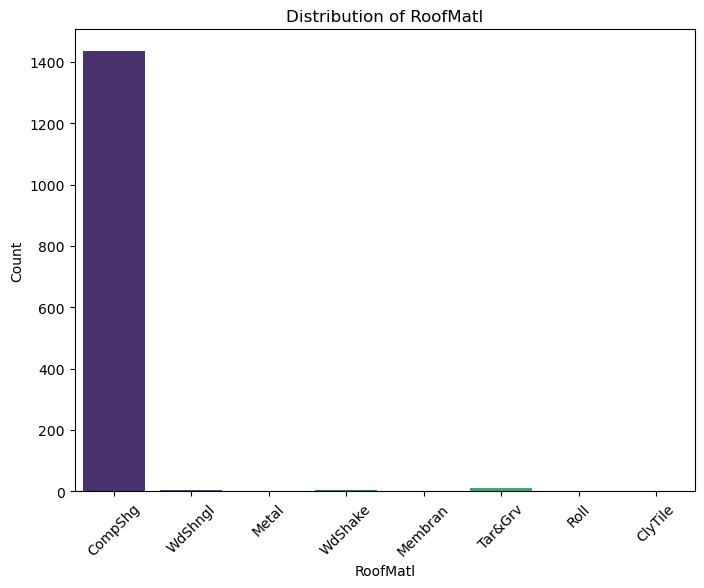

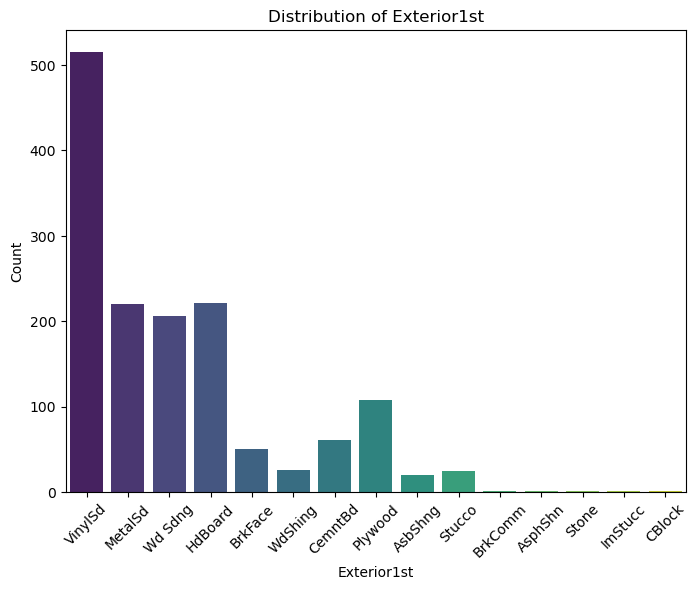

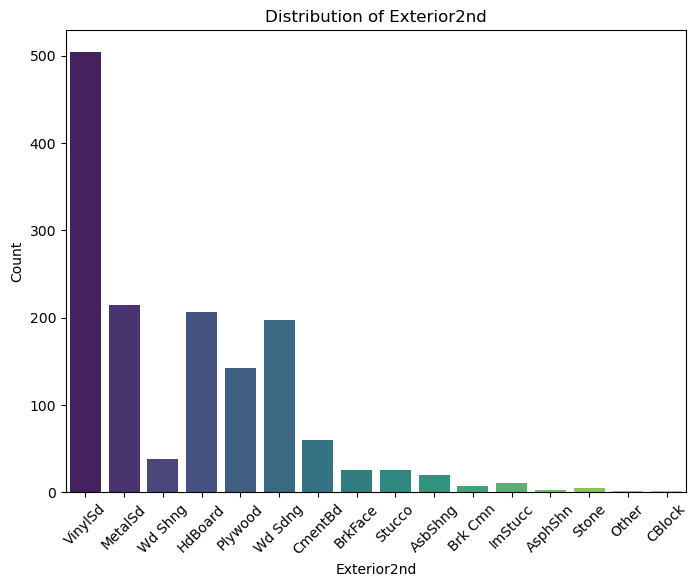

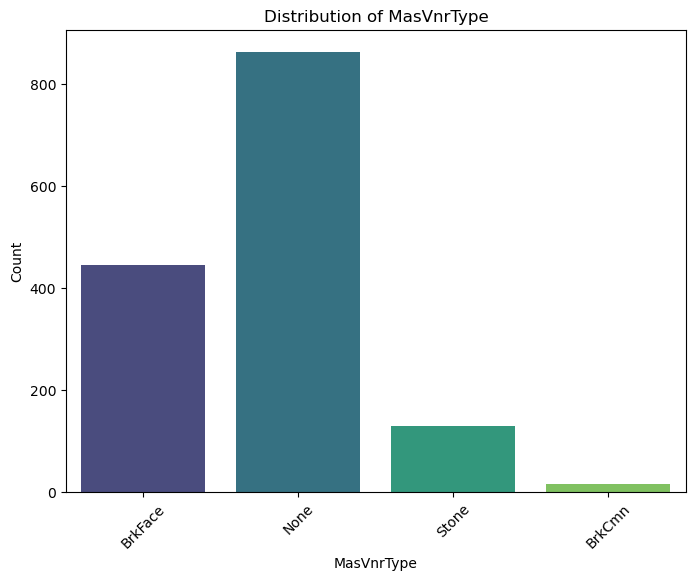

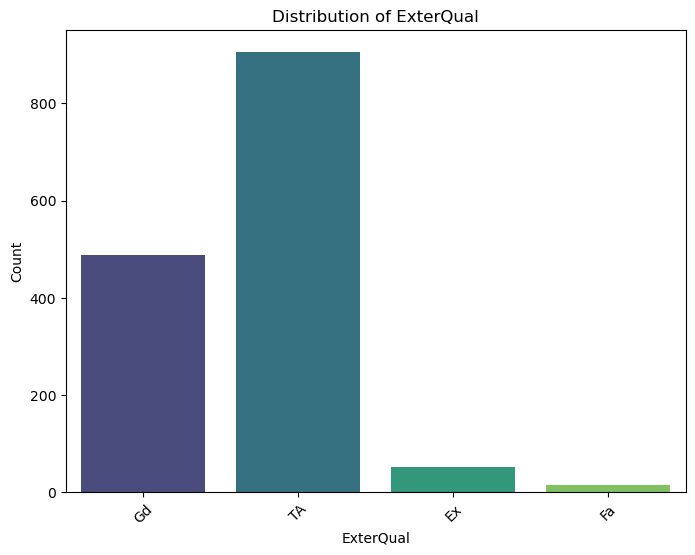

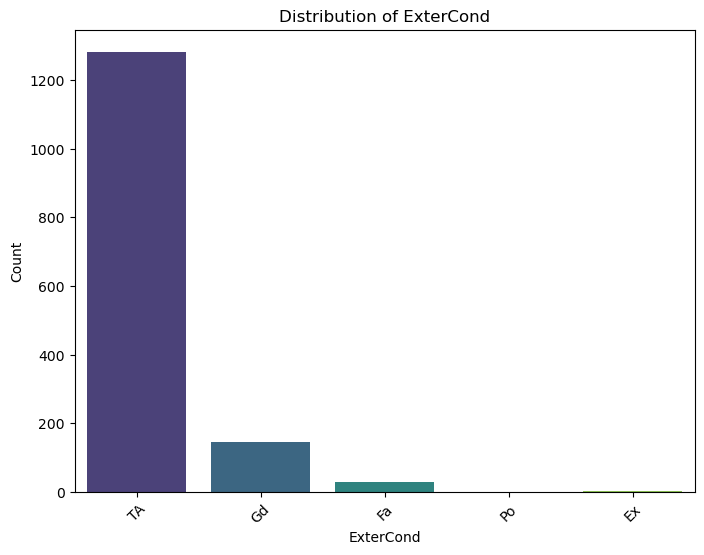

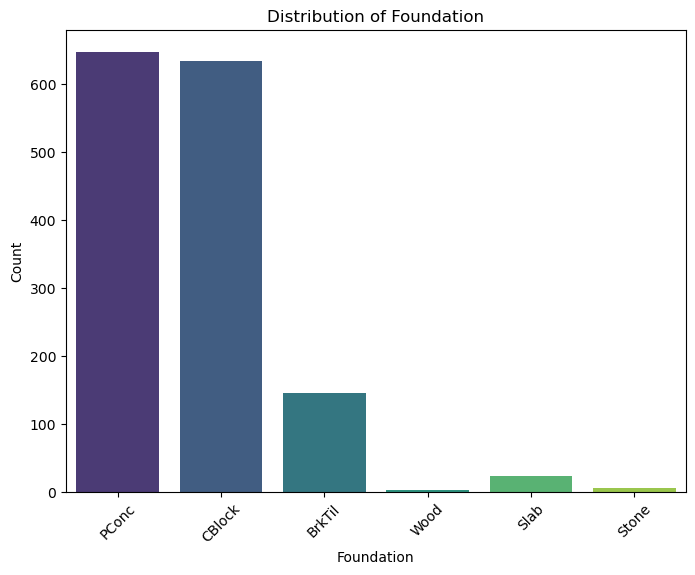

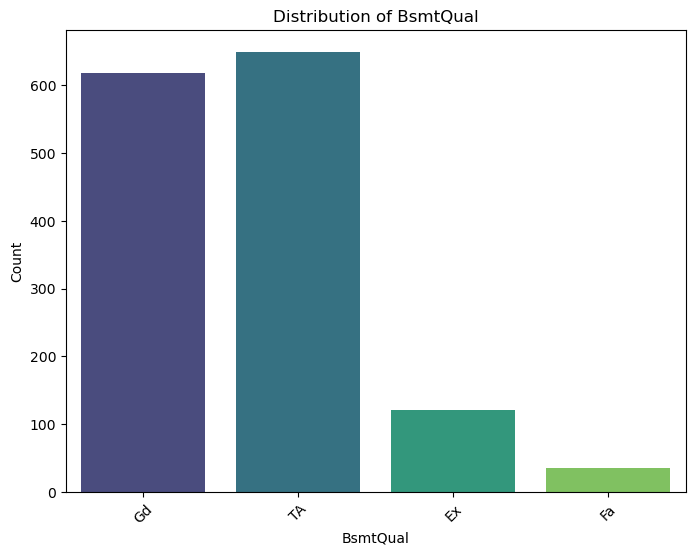

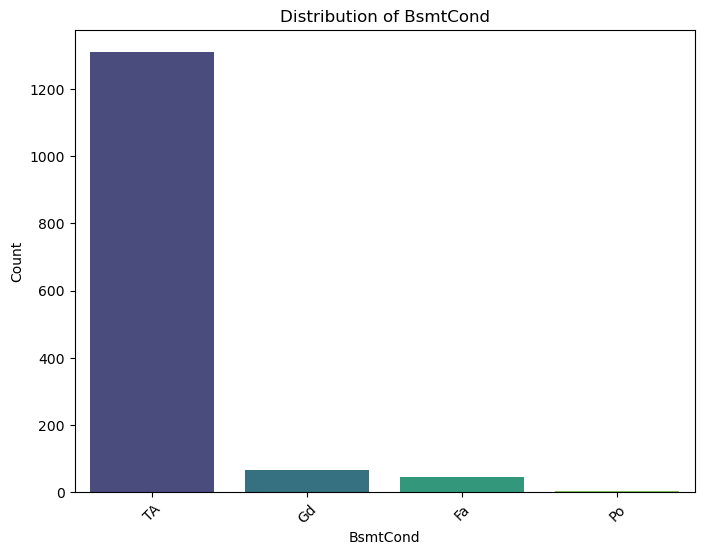

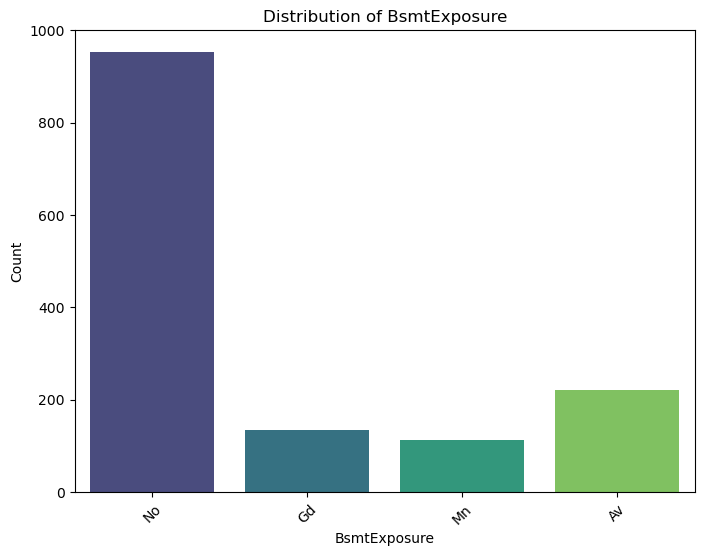

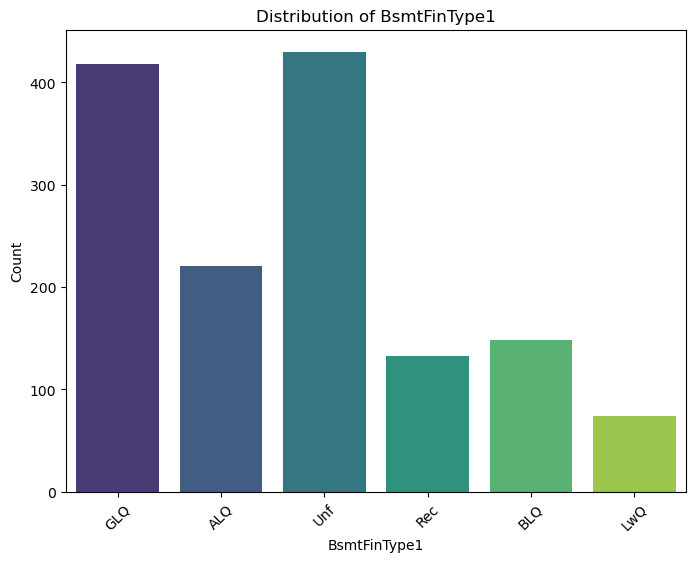

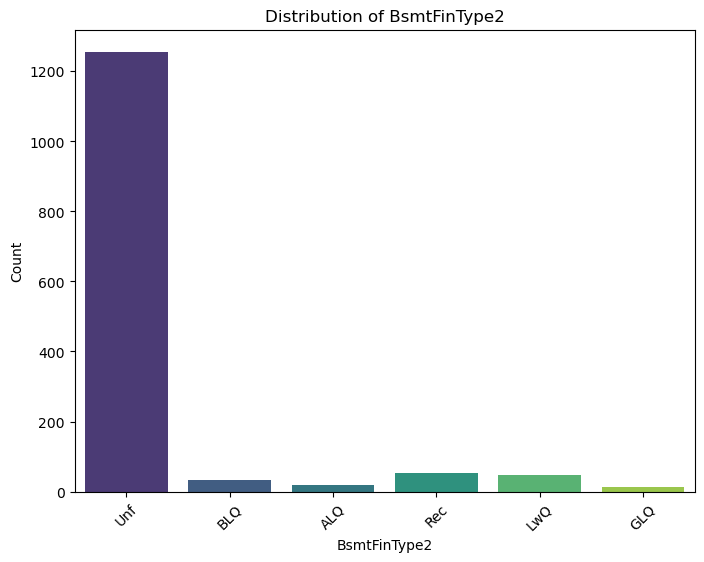

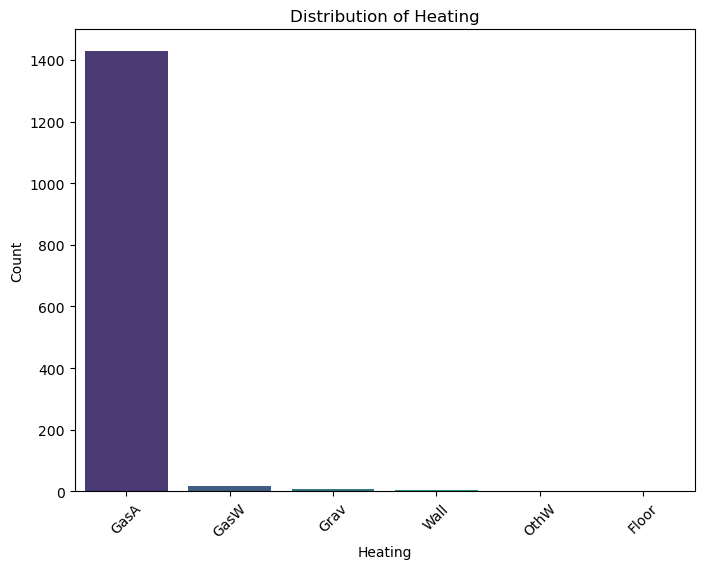

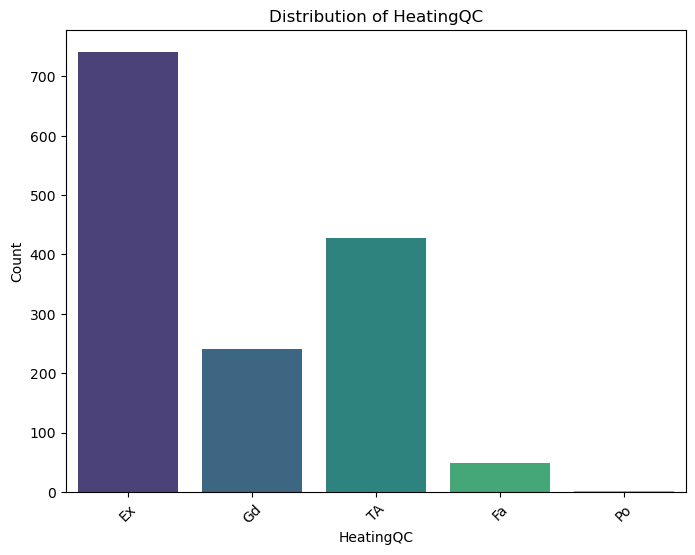

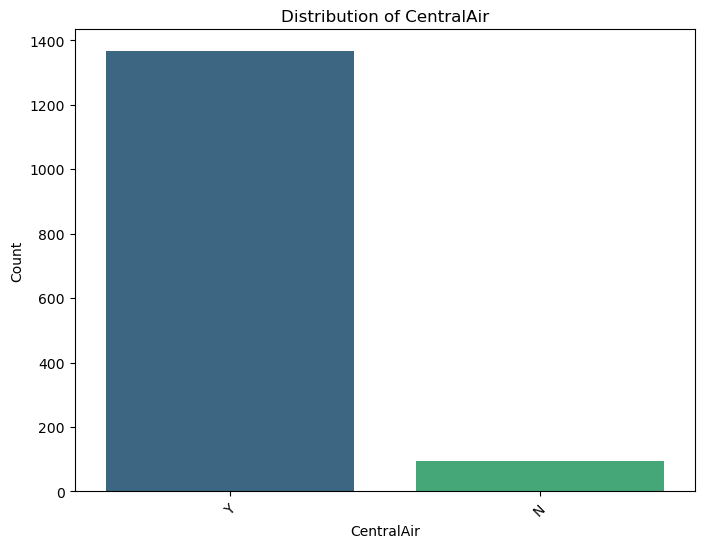

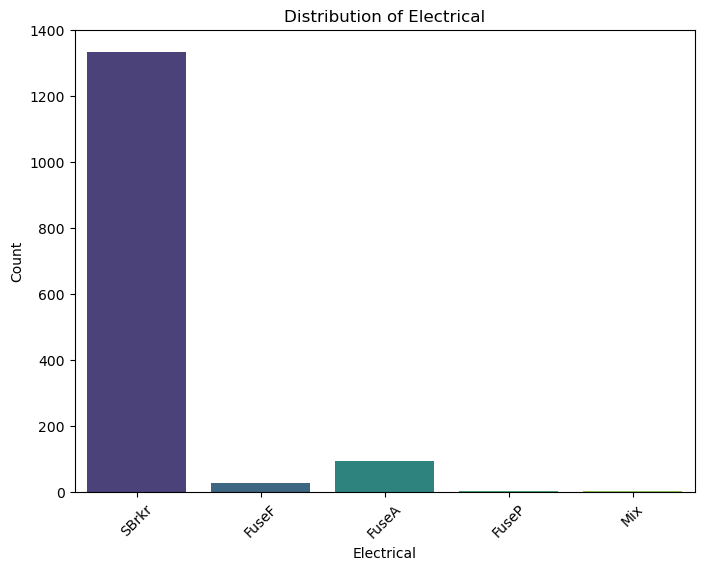

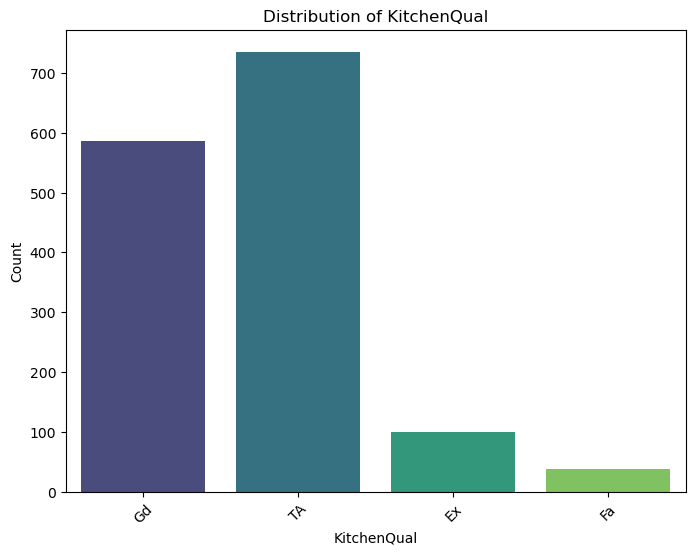

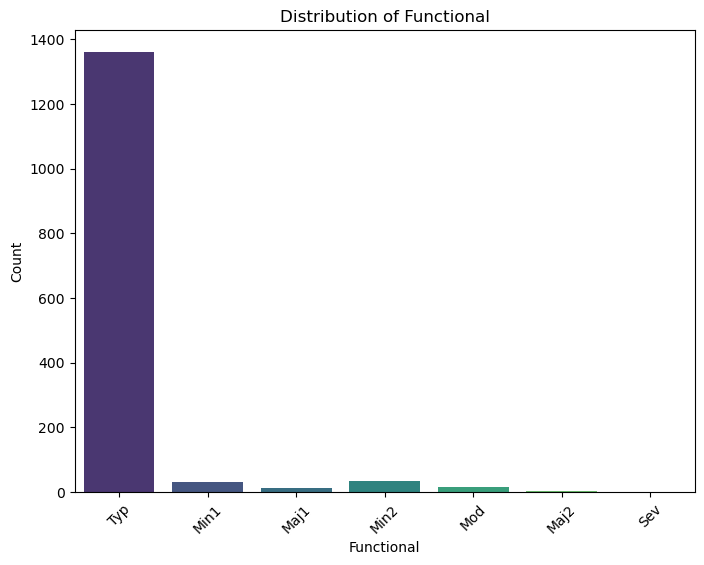

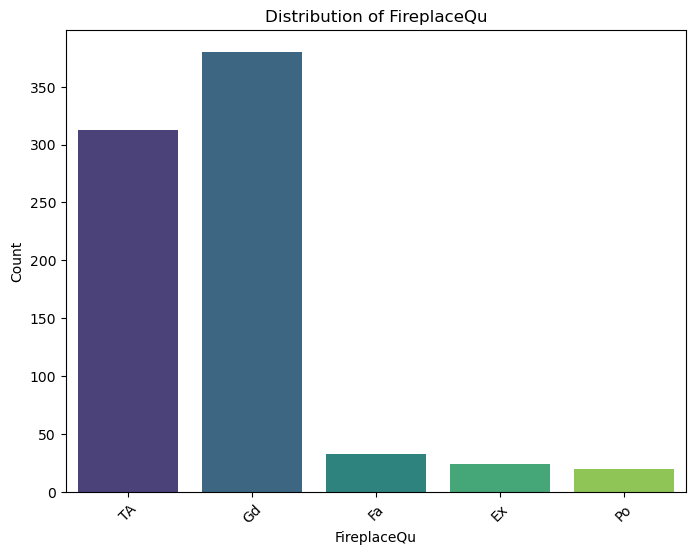

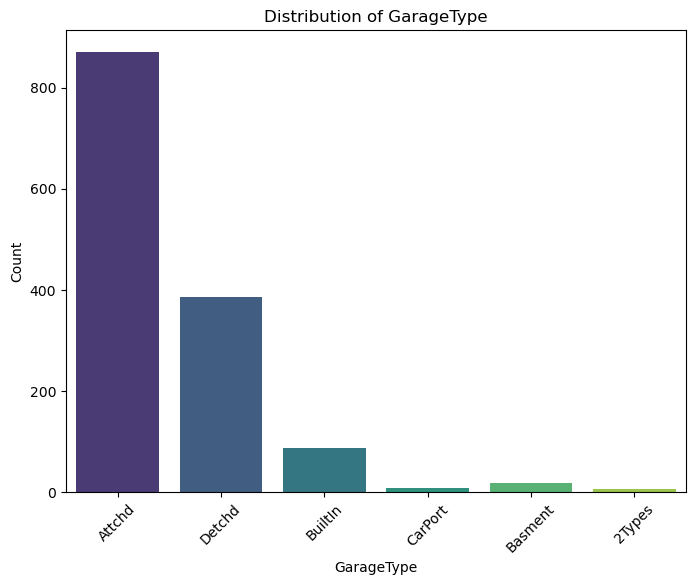

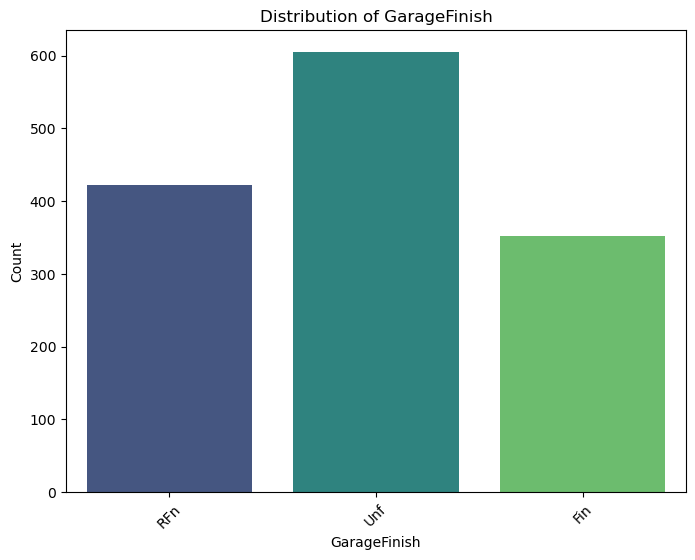

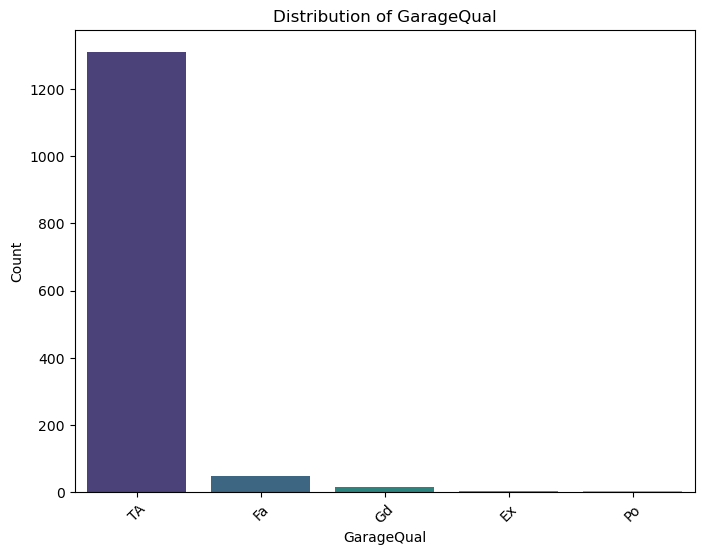

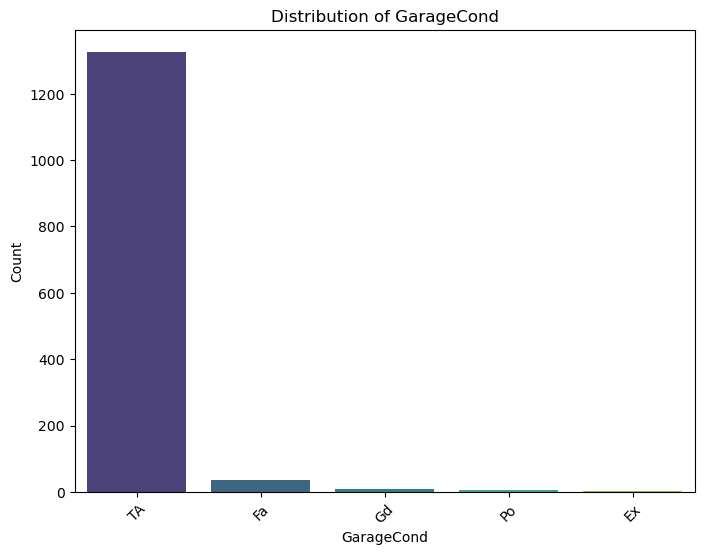

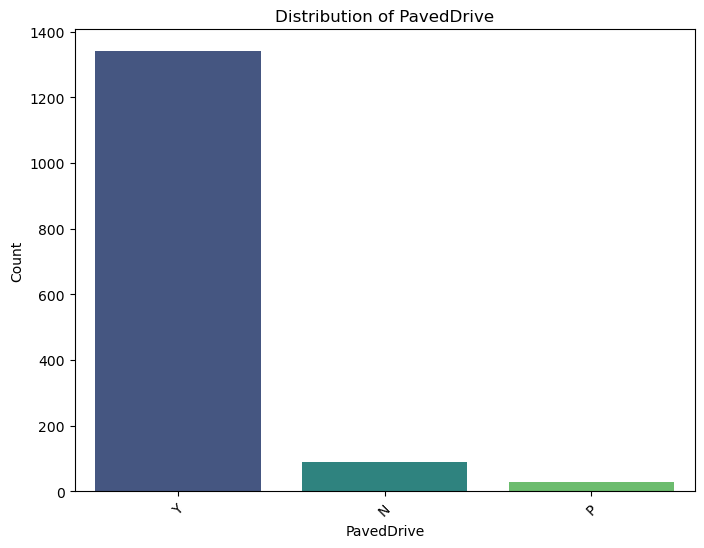

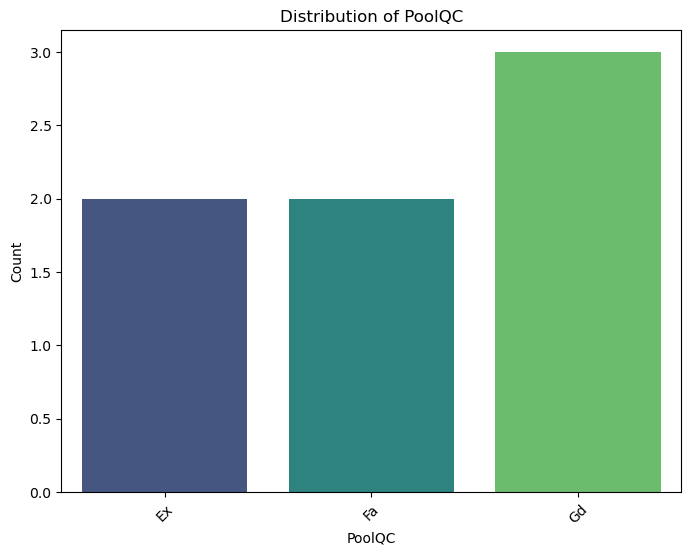

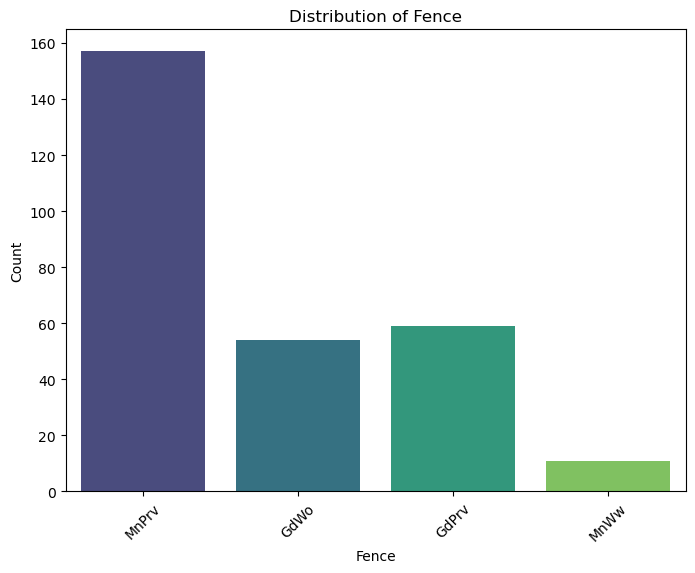

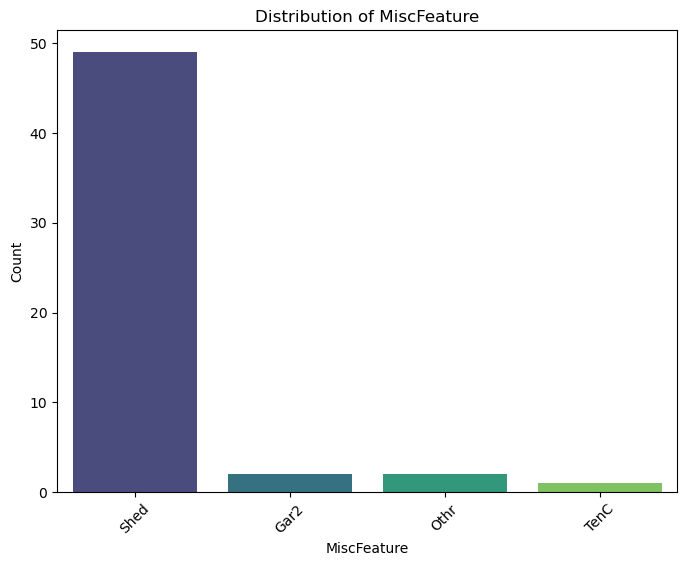

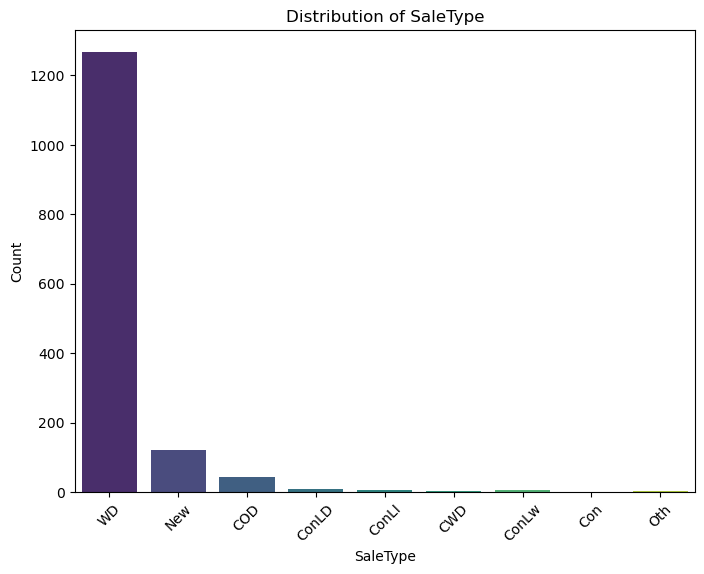

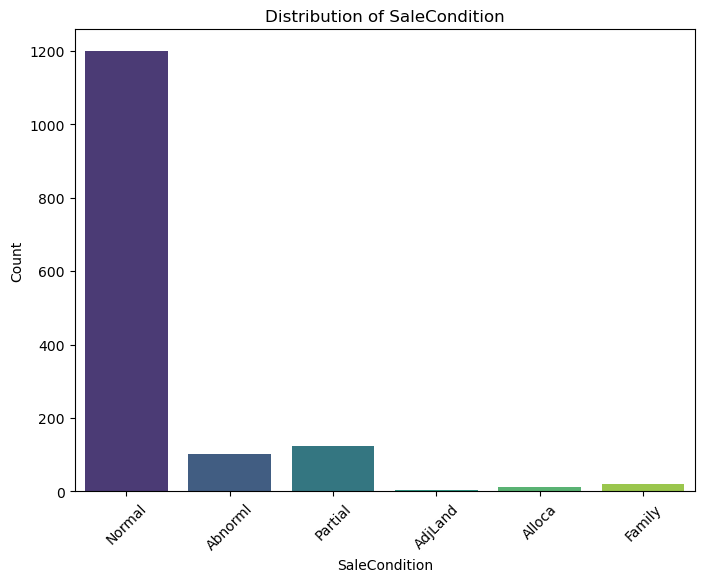

In [14]:
# Distribution of categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[feature], palette="viridis")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


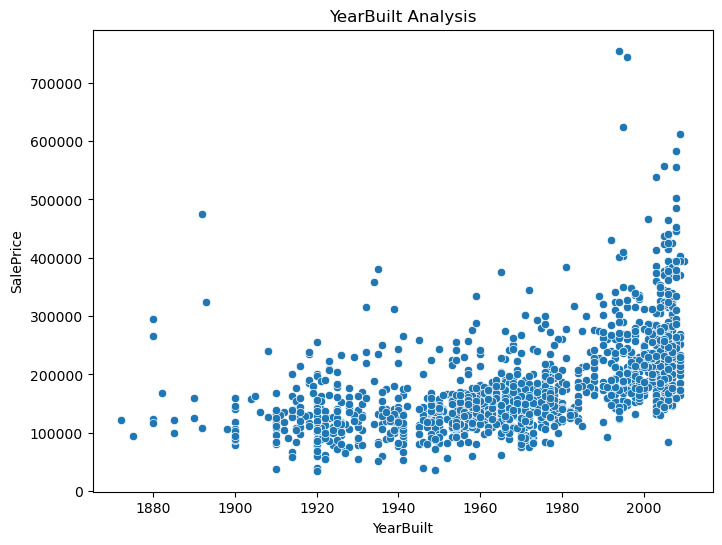

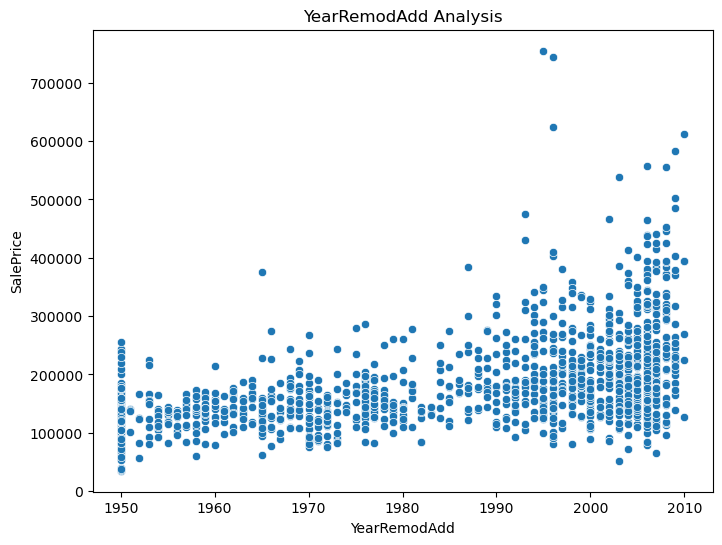

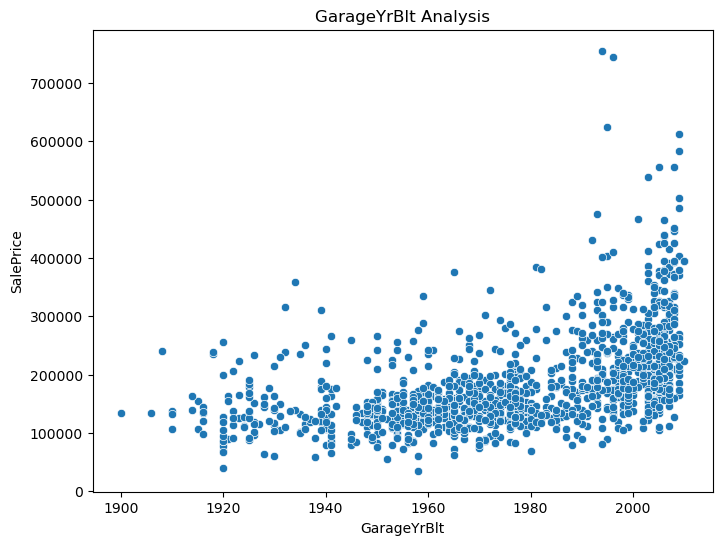

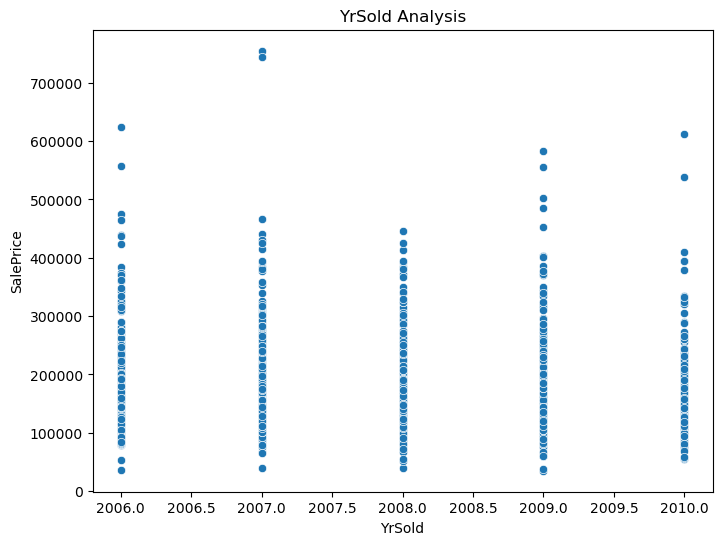

In [15]:
# Scatter plots for year features vs SalePrice
plot_feature_distribution(df, year_features, 'scatter')

Handling Missing values

In [16]:
# Categorical features
missing_categorical = df[categorical_features].isnull().sum()
missing_categorical = missing_categorical[missing_categorical > 0]

print("Missing Categorical Features:")
print(missing_categorical)


Missing Categorical Features:
Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [17]:
def replace_cat_feature(df, features_nan):
    df[features_nan] = df[features_nan].fillna('None')
    return df

df = replace_cat_feature(df, missing_categorical.index)

print(df[missing_categorical.index].isnull().sum())

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64


In [18]:
# Numerical features
missing_numerical = df[numerical_cols].isnull().sum()
missing_numerical = missing_numerical[missing_numerical > 0]

print("Missing Numerical Features:")
print(missing_numerical)

Missing Numerical Features:
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [19]:
# Fill missing values with median
for feature in missing_numerical.index:
    df[feature].fillna(df[feature].median(), inplace=True)

print(df[missing_numerical.index].isnull().sum())


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64


In [20]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df[feature] = df['YrSold'] - df[feature]

In [21]:
print(df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head())

    YearBuilt  YearRemodAdd  GarageYrBlt
Id                                      
1           5             5          5.0
2          31            31         31.0
3           7             6          7.0
4          91            36          8.0
5           8             8          8.0


outlier detection and removal

In [22]:
continuous_features = [
    'SalePrice', 'BsmtUnfSF', 'GrLivArea', 'LotFrontage', '1stFlrSF', 'ScreenPorch',
    'EnclosedPorch', 'OpenPorchSF', 'LotArea', 'WoodDeckSF', 'BsmtFinSF1', 'BsmtFinSF2',
    'MasVnrArea', 'TotalBsmtSF', 'GarageArea', '2ndFlrSF'
]

def check_outliers_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        print(f'Outliers in {feature}: {outliers.shape[0]}')

print("Before removing outliers:\n")
check_outliers_iqr(df, continuous_features + ['SalePrice'])

def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

for feature in continuous_features:
    df = remove_outliers(df, feature)

print("\nAfter removing outliers:\n")
check_outliers_iqr(df, continuous_features + ['SalePrice'])

Before removing outliers:

Outliers in SalePrice: 61
Outliers in BsmtUnfSF: 29
Outliers in GrLivArea: 31
Outliers in LotFrontage: 106
Outliers in 1stFlrSF: 20
Outliers in ScreenPorch: 116
Outliers in EnclosedPorch: 208
Outliers in OpenPorchSF: 77
Outliers in LotArea: 69
Outliers in WoodDeckSF: 32
Outliers in BsmtFinSF1: 7
Outliers in BsmtFinSF2: 167
Outliers in MasVnrArea: 98
Outliers in TotalBsmtSF: 61
Outliers in GarageArea: 21
Outliers in 2ndFlrSF: 2
Outliers in SalePrice: 61

After removing outliers:

Outliers in SalePrice: 19
Outliers in BsmtUnfSF: 0
Outliers in GrLivArea: 2
Outliers in LotFrontage: 25
Outliers in 1stFlrSF: 0
Outliers in ScreenPorch: 0
Outliers in EnclosedPorch: 0
Outliers in OpenPorchSF: 16
Outliers in LotArea: 3
Outliers in WoodDeckSF: 1
Outliers in BsmtFinSF1: 0
Outliers in BsmtFinSF2: 0
Outliers in MasVnrArea: 22
Outliers in TotalBsmtSF: 0
Outliers in GarageArea: 0
Outliers in 2ndFlrSF: 0
Outliers in SalePrice: 19


In [23]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave  None      Reg   
2           20       RL         80.0     9600   Pave  None      Reg   
3           60       RL         68.0    11250   Pave  None      IR1   
5           60       RL         84.0    14260   Pave  None      IR1   
6           50       RL         85.0    14115   Pave  None      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
6          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5          5   
2        Norm     1Fam     1Story            6            8         31   
3        Norm     1Fam     2Story            7            5          7   
5        Norm     1Fam     2Story            8            5          8   
6        Norm     1Fam     1.5Fin            5            5         16   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1              5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2             31     Gable  CompShg     MetalSd     MetalSd       None   
3              6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5              8     Gable  CompShg     VinylSd     VinylSd    BrkFace   
6             14     Gable  CompShg     VinylSd     VinylSd       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
5        350.0        Gd        TA      PConc       Gd       TA           Av   
6          0.0        TA        TA       Wood       Gd       TA           No   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
5           GLQ         655          Unf           0        490         1145   
6           GLQ         732          Unf           0         64          796   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   
6     GasA        Ex          Y      SBrkr       796       566             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

Feature Transformation

In [24]:
categorical_df = df.select_dtypes(include=['object'])

for feature in categorical_df.columns:
    print(f'Unique values in {feature}:')
    print(categorical_df[feature].unique())
    print("\n")


Unique values in MSZoning:
['RL' 'RM' 'FV' 'RH' 'C (all)']


Unique values in Street:
['Pave' 'Grvl']


Unique values in Alley:
['None' 'Grvl' 'Pave']


Unique values in LotShape:
['Reg' 'IR1' 'IR2']


Unique values in LandContour:
['Lvl' 'Bnk' 'HLS' 'Low']


Unique values in Utilities:
['AllPub']


Unique values in LotConfig:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


Unique values in LandSlope:
['Gtl' 'Mod' 'Sev']


Unique values in Neighborhood:
['CollgCr' 'Veenker' 'NoRidge' 'Mitchel' 'Somerst' 'BrkSide' 'Sawyer'
 'NAmes' 'SawyerW' 'MeadowV' 'NridgHt' 'Gilbert' 'OldTown' 'Edwards'
 'NWAmes' 'IDOTRR' 'Timber' 'Blmngtn' 'SWISU' 'ClearCr' 'Crawfor'
 'StoneBr' 'NPkVill']


Unique values in Condition1:
['Norm' 'Feedr' 'Artery' 'RRAe' 'PosN' 'RRAn' 'RRNe' 'RRNn']


Unique values in Condition2:
['Norm' 'Artery' 'Feedr' 'RRAn']


Unique values in BldgType:
['1Fam' '2fmCon' 'TwnhsE' 'Duplex']


Unique values in HouseStyle:
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SLvl' 'SFoyer' '2.5Fin' '2.5U

In [25]:
target = df['SalePrice']

#target encoding
def target_encode(df, feature, target):
    encoding_map = df.groupby(feature)[target].mean().to_dict()
    df[feature] = df[feature].map(encoding_map)
    return df

for feature in categorical_features:
    df = target_encode(df, feature, 'SalePrice')

print(df)

      MSSubClass       MSZoning  LotFrontage  LotArea         Street  \
Id                                                                     
1             60  173942.432624         65.0     8450  170235.479821   
2             20  173942.432624         80.0     9600  170235.479821   
3             60  173942.432624         68.0    11250  170235.479821   
5             60  173942.432624         84.0    14260  170235.479821   
6             50  173942.432624         85.0    14115  170235.479821   
7             20  173942.432624         75.0    10084  170235.479821   
10           190  173942.432624         50.0     7420  170235.479821   
11            20  173942.432624         70.0    11200  170235.479821   
14            20  173942.432624         91.0    10652  170235.479821   
16            45  121723.128571         51.0     6120  170235.479821   
17            20  173942.432624         69.0    11241  170235.479821   
19            20  173942.432624         66.0    13695  170235.47

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[continuous_features] = scaler.fit_transform(df[continuous_features])

print(df[continuous_features].head())


    SalePrice  BsmtUnfSF  GrLivArea  LotFrontage  1stFlrSF  ScreenPorch  \
Id                                                                        
1    0.710399  -1.077059   0.782170    -0.242211 -0.839297          0.0   
2    0.212351  -0.753564  -0.347084     0.937204  0.592337          0.0   
3    0.987092  -0.391443   0.973740    -0.006328 -0.613621          0.0   
5    1.475917  -0.256251   2.012250     1.251714  0.179773          0.0   
6   -0.497829  -1.284675  -0.095019     1.330342 -1.050868          0.0   

    EnclosedPorch  OpenPorchSF   LotArea  WoodDeckSF  BsmtFinSF1  BsmtFinSF2  \
Id                                                                             
1             0.0     0.565801 -0.253272   -0.859347    0.690610         0.0   
2             0.0    -0.854026  0.200654    2.156543    1.376525         0.0   
3             0.0     0.123560  0.851938   -0.859347    0.135825         0.0   
5             0.0     1.101146  2.040038    1.083777    0.562000         0

In [27]:
df.head()

MSSubClass       MSZoning  LotFrontage   LotArea         Street  \
Id                                                                    
1           60  173942.432624    -0.242211 -0.253272  170235.479821   
2           20  173942.432624     0.937204  0.200654  170235.479821   
3           60  173942.432624    -0.006328  0.851938  170235.479821   
5           60  173942.432624     1.251714  2.040038  170235.479821   
6           50  173942.432624     1.330342  1.982804  170235.479821   

            Alley       LotShape    LandContour      Utilities      LotConfig  \
Id                                                                              
1   171118.255814  161012.952381  170277.104502  169988.120715  169374.739394   
2   171118.255814  161012.952381  170277.104502  169988.120715  170378.857143   
3   171118.255814  185246.012448  170277.104502  169988.120715  169374.739394   
5   171118.255814  185246.012448  170277.104502  169988.120715  170378.857143   
6   171118.255814  185246.012448  170277.104502  169988.120715  169374.739394   

        LandSlope   Neighborhood     Condition1     Condition2       BldgType  \
Id                                                                              
1   170137.996928  191007.051724  173080.650255  170315.778111  170788.502591   
2   170137.996928  174000.000000  139849.400000  170315.778111  170788.502591   
3   170137.996928  191007.051724  173080.650255  170315.778111  170788.502591   
5   170137.996928  281348.750000  173080.650255  170315.778111  170788.502591   
6   170137.996928  152217.391304  173080.650255  170315.778111  170788.502591   

       HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                     
1   205480.910053            7            5          5             5   
2   161869.664789            6            8         31            31   
3   205480.910053            7            5          7             6   
5   205480.910053            8            5          8             8   
6   130600.847458            5            5         16            14   

        RoofStyle       RoofMatl    Exterior1st    Exterior2nd     MasVnrType  \
Id                                                                              
1   170563.064286  170059.086697  195597.881188  195521.218543  183002.766355   
2   170563.064286  170059.086697  145303.580000  145649.562500  154169.967337   
3   170563.064286  170059.086697  195597.881188  195521.218543  183002.766355   
5   170563.064286  170059.086697  195597.881188  195521.218543  183002.766355   
6   170563.064286  170059.086697  195597.881188  195521.218543  154169.967337   

    MasVnrArea      ExterQual      ExterCond     Foundation       BsmtQual  \
Id                                                                           
1     1.251981  212398.850575  173863.895623  201501.098592  193217.549133   
2    -0.676747  141096.824121  173863.895623  137466.299625  193217.549133   
3     0.917405  212398.850575  173863.895623  201501.098592  193217.549133   
5     2.767410  212398.850575  173863.895623  201501.098592  193217.549133   
6    -0.676747  141096.824121  173863.895623  196500.000000  193217.549133   

       BsmtCond   BsmtExposure   BsmtFinType1  BsmtFinSF1   BsmtFinType2  \
Id                                                                         
1   170640.4432  161938.496703  203102.609649    0.690610  169988.120715   
2   170640.4432  201284.844444  147617.307692    1.376525  169988.120715   
3   170640.4432  179121.708333  203102.609649    0.135825  169988.120715   
5   170640.4432  184687.319672  203102.609649    0.562000  169988.120715   
6   170640.4432  161938.496703  203102.609649    0.756175  169988.120715   

    BsmtFinSF2  BsmtUnfSF  TotalBsmtSF        Heating  HeatingQC  \
Id                                                                 
1          0.0  -1.077059    -0.580203  170673.126316   194172.5   
2          0.

In [28]:
dataset=df.copy()
X = dataset.drop('SalePrice', axis=1)
y = dataset['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest

In [29]:
# Train the Random Forest model
rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate model performance
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R^2 Score: 0.8825434330370712
MAE: 0.2558877795189022


HyperParameter Tunning Random Forest

In [30]:
# Hyperparameter Tunning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='r2', cv=2, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

Fitting 2 folds for each of 324 candidates, totalling 648 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best R² Score: 0.8549073192254555


Linear Regression 

In [31]:
#linear Regression
X_unscaled = df.copy()

numerical_features = X_unscaled.select_dtypes(include=[np.number]).columns

correlation_matrix = X_unscaled[numerical_features].corr()

high_corr_pairs = [
    (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
    for i in range(len(correlation_matrix.columns))
    for j in range(i)
    if abs(correlation_matrix.iloc[i, j]) > 0.8
]

print("Highly correlated features (correlation > 0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

features_to_drop = [pair[0] for pair in high_corr_pairs]
print("Features to drop:", features_to_drop)

X_unscaled = X_unscaled.drop(features_to_drop, axis=1)

X_scaled = df.drop(features_to_drop, axis=1)

print("Unscaled dataset shape:", X_unscaled.shape)
print("Scaled dataset shape:", X_scaled.shape)

Highly correlated features (correlation > 0.8):
Exterior2nd and Exterior1st: 0.965853468807021
1stFlrSF and TotalBsmtSF: 0.8882558986711312
TotRmsAbvGrd and GrLivArea: 0.8265138740097523
FireplaceQu and Fireplaces: 0.8080134266692949
GarageYrBlt and YearBuilt: 0.8444666815066808
GarageArea and GarageCars: 0.8842069357132237
GarageCond and GarageQual: 0.8874939592187163
PoolQC and PoolArea: 0.9999999999999986
SalePrice and OverallQual: 0.8162321193680778
Features to drop: ['Exterior2nd', '1stFlrSF', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'PoolQC', 'SalePrice']
Unscaled dataset shape: (671, 71)
Scaled dataset shape: (671, 71)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R^2 Score: 0.8901735244459978
MAE: 0.24433189618866902


XGBoost

In [33]:
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("XGBoost R² Score:", r2_score(y_test, y_pred))
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred)) 

XGBoost R² Score: 0.8854440020946504
XGBoost MAE: 0.2511324176646913


In [34]:
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42
)

param_grid = {
    'learning_rate': np.linspace(0.01, 0.1, 10),
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [100, 200, 300, 500],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3]
}

random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    scoring='neg_mean_squared_error',
    cv=2,  # 2-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best model and predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print results
print("Best Parameters:", random_search.best_params_)
print("XGBoost R² Score:", r2_score(y_test, y_pred))
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred))


Fitting 2 folds for each of 20 candidates, totalling 40 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.06000000000000001, 'gamma': 0.1, 'colsample_bytree': 0.7}
XGBoost R² Score: 0.90419940191027
XGBoost MAE: 0.22963830360538623
